<a href="https://colab.research.google.com/github/Suraj-7077/Supervised-ML-Classification-Email-campaign-prediction/blob/main/Supervised_ML_Classification_Capstone_project_III_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Info:- 

## Project Type - EDA and Supervised ML Classification Model Building

## Project Title - Email Campaign Effectiveness Prediction

## Contribution - Individual

## Created by - Suraj Shrikant Galande

# Project Statement :-  

## Business objective:-  

### Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in Business.

###  The main objective is to create a machine learning model to characterize the mail and track the mail that is:- 
ignored:- Class = 0 

read:- Class = 1

 acknowledged by the reader :- Class =2

# GitHub Repo Link

https://github.com/Suraj-7077/Supervised-ML-Classification-Email-campaign-prediction.git

# Dataset Description

1) Email_ID - This column contains email ids of customers.

2)  Email_type - Email type contains 2 categories i.e. 1 and 2. We can assume that the types are like marketing emails or important updates,notices like email regarding the business 

3) Subject_Hotness_Score - It is the emails subject's score on the basis of how good and effective contents is.

4) Email_Source - It represents the source of the email like sales and marketing or important admin mails related to the product.

5) Email_Campaign_Type - The Campaign type of email.

6) Total_Past_Communications - This mail contains, The total previous mails from the same source, the number of communication with customers had. 

7) Customer_Location - Categorical data which explains the different demographic location of the customers.

8) Time_Email_sent_Category - It has 3 categories of time slots:

 email sent at morning time slot = 1

 email sent at evening time slot = 2

 email sent at night time sllot = 3

9) Word_Count - It contains the no.of words in the mail.

10) Total_Links - Total links in the email body.

11) Total_Images - The number of images in the email body.

12) Email_Status - It is the target variable which contains the characterization of the mail that is 

ignored = 0 

read = 1

acknowledged by the reader = 2

## Now performing EDA and see how this email dataset is giving prediction regarding email status 

# EDA 

# 1) Importing Lbraries 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# To build ML models Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn.naive_bayes import MultinomialNB

# Importing warnings to avoid it if any generated in code
import warnings 
warnings.filterwarnings('ignore')

# 2) loading dataset

In [2]:
path = "/content/drive/MyDrive/ Capstone project/Supervised ML Classification Project/data_email_campaign.csv"

In [3]:
email_df = pd.read_csv(path)

# 3) Preprocessing The Data

In [4]:
# looking First 5 rows of dataset

email_df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [5]:
email_df.shape

(68353, 12)

As we see that email dataset contains 68353 number of observations (Rows) and 12 features (columns).

In [6]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


In [7]:
email_df.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

# 4) Statistical summary of dataset

In [8]:

email_df.describe(include='all')                 ## include = 'all' contains all numerical and categorical features.

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353,68353.000000,68353.000000,68353.000000,56758,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
unique,68353,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,EMA00081000034500,NaN,NaN,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,23173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.285094,1.095481,1.456513,NaN,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,NaN,0.451462,0.997578,0.498109,NaN,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,NaN,1.000000,0.000000,1.000000,NaN,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,NaN,1.000000,0.200000,1.000000,NaN,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,NaN,1.000000,0.800000,1.000000,NaN,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,NaN,2.000000,1.800000,2.000000,NaN,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000


This displays summary of statistics of dataframe

Information of different descriptive statistics :-

1) Measures of Frequency :- Count, Percent, Frequency.

2) Measures of Central Tendency :- Mean, Median, and Mode.

3)Measures of Dispersion or Variation or spread :- Range( max - min ),Variance, Standard Deviation.

4) Measures of Position :- Percentile Ranks, Quartile Ranks.

# 5)  Checking Null values 

In [9]:
email_df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

In [10]:
# Percentage of null values in each feature

print(email_df.isnull().sum()/ len(email_df)*100)
pd.options.display.float_format = '{:,.2f} %'.format

Email_ID                      0.000000
Email_Type                    0.000000
Subject_Hotness_Score         0.000000
Email_Source_Type             0.000000
Customer_Location            16.963411
Email_Campaign_Type           0.000000
Total_Past_Communications     9.984931
Time_Email_sent_Category      0.000000
Word_Count                    0.000000
Total_Links                   3.220049
Total_Images                  2.453440
Email_Status                  0.000000
dtype: float64


---> We have some features which have null values present

1) Customer_location column have 11595 i.e. 16.96% of observations are missing 

2) Total_past_Communications have 6825 i.e 9.98% of  observations are missing

3) Total_links have 2201 i.e. 3.22% of observations are missing

4) Total_Images have 1677 i.e. 2.45% of observations are missing.


So there are quite large number of null values presents in thses 4 features so we will be handling in data cleaning section.

# 6)  Checking duplicated values

In [11]:
email_df.duplicated().sum()

0

---> hence no duplicated values present in features so no need to perform duplication removel operation

# 7) Handling Missing values

The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.

features which have null values :-  

i) Customer_location 

ii) Total_past_Communications

 iii) Total_links

 iv) Total_Images 

### i) Handling Null values of Customer_locations feature

In [12]:
# First of all checking distribution of Customer_location feature

email_df['Customer_Location'].value_counts()

G    23173
E    10193
D     7406
C     5758
F     4433
B     4341
A     1454
Name: Customer_Location, dtype: int64

<AxesSubplot:xlabel='Customer_Location', ylabel='count'>

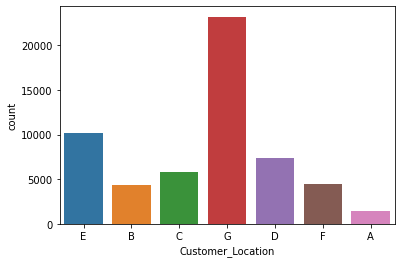

In [13]:
sns.countplot(email_df['Customer_Location'])

### Checking dependancy of customer location wrt dependent feature ( Email_status)

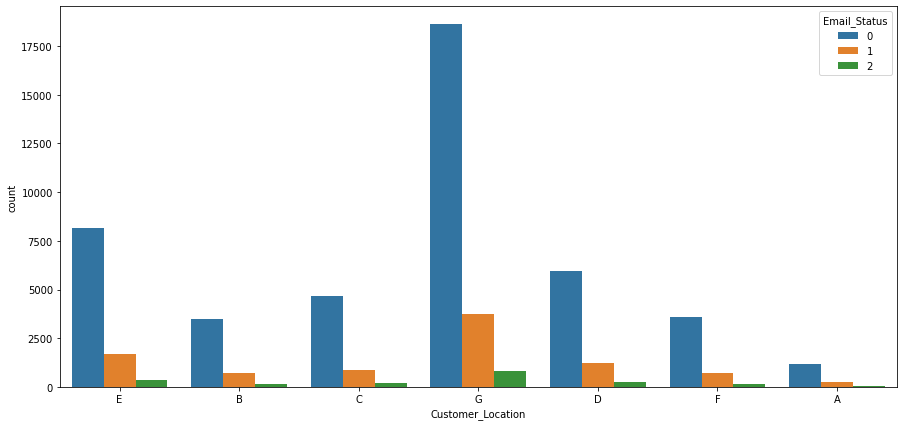

In [14]:
plt.figure(figsize=(15,7))
ax = sns.countplot(email_df['Customer_Location'], hue=email_df['Email_Status'])


Since Customer_location contains 16.96% of missing values i.e. there are very large number of missing values in this feature so this feature will not give much importance in our dataset. 

As we can see irrespective of location the  <b>Email_Status</b> is same throughout.
so it is better to drop this column instead of treating null values.

In [15]:
email_df.drop('Customer_Location', inplace=True, axis=1)

In [16]:
email_df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.20 %,2,2,33.00 %,1,440,8.00 %,0.00 %,0
1,EMA00081000045360,2,2.10 %,1,2,15.00 %,2,504,5.00 %,0.00 %,0
2,EMA00081000066290,2,0.10 %,1,3,36.00 %,2,962,5.00 %,0.00 %,1
3,EMA00081000076560,1,3.00 %,2,2,25.00 %,2,610,16.00 %,0.00 %,0
4,EMA00081000109720,1,0.00 %,2,3,18.00 %,2,947,4.00 %,0.00 %,0


In [17]:
email_df.shape              # after removing Customer location column

(68353, 11)

### ii) Handeling Total_past_Communications feature

In [18]:
email_df['Total_Past_Communications'].value_counts()

30.00 %    2990
20.00 %    2925
25.00 %    2391
40.00 %    2251
35.00 %    1881
           ... 
63.00 %      40
64.00 %      36
65.00 %      33
66.00 %      18
67.00 %       9
Name: Total_Past_Communications, Length: 64, dtype: int64

Since Total_Past_Communications column is numerical datatype so let us check its distribution.

<AxesSubplot:xlabel='Total_Past_Communications', ylabel='Density'>

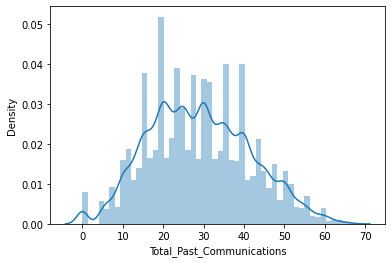

In [19]:
sns.distplot(email_df['Total_Past_Communications'])

----> As we see that data is distributed quite well symmetrically.

And we know that whenever feature type is numerical then we can replace its missing values by there mean value.

In [20]:
print('Number of missing values in Total_past_communications before imputing is = ',email_df['Total_Past_Communications'].isnull().sum())
email_df['Total_Past_Communications'].fillna(email_df['Total_Past_Communications'].mean(),inplace=True)           # filling missing values by there mean values.
print('Number of missing values in Total_past_communications after imputing is = ',email_df['Total_Past_Communications'].isnull().sum())

Number of missing values in Total_past_communications before imputing is =  6825
Number of missing values in Total_past_communications after imputing is =  0


So we have succesfully handled missing values of Total past communication feature

### iii) Now handelling missing values of Total_Links columns	

In [21]:
email_df['Total_Links'].value_counts()         ## Gives values of number of links in email body.

11.00 %    11400
6.00 %     10644
4.00 %      7274
9.00 %      5824
8.00 %      5651
14.00 %     4967
21.00 %     4372
16.00 %     3922
5.00 %      2056
2.00 %      1357
3.00 %      1341
7.00 %      1129
31.00 %     1106
26.00 %      863
18.00 %      841
1.00 %       706
19.00 %      616
13.00 %      444
10.00 %      435
24.00 %      338
12.00 %      247
28.00 %      161
41.00 %      144
36.00 %       71
29.00 %       63
15.00 %       56
23.00 %       21
46.00 %       20
17.00 %       18
34.00 %       14
39.00 %       13
20.00 %       10
33.00 %        8
25.00 %        7
49.00 %        6
22.00 %        5
44.00 %        2
Name: Total_Links, dtype: int64

<AxesSubplot:xlabel='Total_Links', ylabel='Density'>

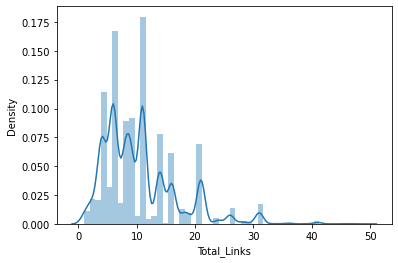

In [22]:
# Dstribution of Total_links column

sns.distplot(email_df['Total_Links'])

As we see that Total_links feature is not normally distributed so we cannot use mean to fill missing values because, mean is sensitive to outliers.

so we use mode to fill missing values.

In [23]:
print('number of missing values in Total_links before imputing is = ', email_df['Total_Links'].isnull().sum())
email_df['Total_Links'].fillna(email_df['Total_Links'].mode()[0],inplace=True)

print('number of missing values in Total_links after imputing is = ', email_df['Total_Links'].isnull().sum())

number of missing values in Total_links before imputing is =  2201
number of missing values in Total_links after imputing is =  0


### iv) Now treating missing values in Total_images column

In [24]:
email_df['Total_Images'].value_counts()

0.00 %     35060
2.00 %      3331
3.00 %      3164
1.00 %      3024
4.00 %      2907
5.00 %      2732
6.00 %      2133
7.00 %      2107
8.00 %      1804
10.00 %     1507
9.00 %      1497
12.00 %      943
13.00 %      923
11.00 %      882
14.00 %      684
15.00 %      660
17.00 %      483
16.00 %      435
18.00 %      399
19.00 %      383
20.00 %      347
22.00 %      171
23.00 %      161
25.00 %      158
21.00 %      142
24.00 %      116
27.00 %      102
26.00 %       80
28.00 %       75
29.00 %       75
30.00 %       69
34.00 %       16
32.00 %       15
31.00 %       13
35.00 %       13
36.00 %       12
33.00 %       10
40.00 %       10
39.00 %        9
37.00 %        9
38.00 %        8
43.00 %        4
45.00 %        1
41.00 %        1
44.00 %        1
Name: Total_Images, dtype: int64

<AxesSubplot:xlabel='Total_Images', ylabel='Density'>

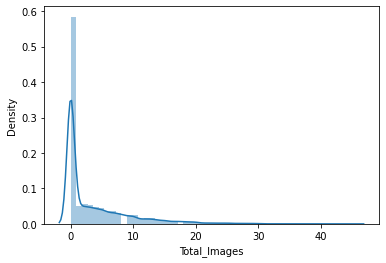

In [25]:
sns.distplot(email_df['Total_Images'])

So distribution is not symmetric so we cant use mean values to fill missing values.

using mode to replace null value

In [26]:
print('number of misssing values in Total_Images before imputing is= ', email_df['Total_Images'].isnull().sum())
email_df['Total_Images'].fillna(email_df['Total_Images'].mode()[0], inplace=True)
print('number of  missing values in Total_Images after imputing is = ', email_df['Total_Images'].isnull().sum())

number of misssing values in Total_Images before imputing is=  1677
number of  missing values in Total_Images after imputing is =  0


### So we have succesfully handeled null values of all features of our dataframe.

In [27]:
email_df.head(2)

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.20 %,2,2,33.00 %,1,440,8.00 %,0.00 %,0
1,EMA00081000045360,2,2.10 %,1,2,15.00 %,2,504,5.00 %,0.00 %,0


Up till now we have cleaned our dataset quite well. 

Outlier removal treatment will studied in later part. 

# 8) Data visuslization of Features 

## i) Distribution of Target variable in our DataFrame.

In [28]:
email_df['Email_Status'].value_counts()

0    54941
1    11039
2     2373
Name: Email_Status, dtype: int64

<AxesSubplot:xlabel='Email_Status', ylabel='count'>

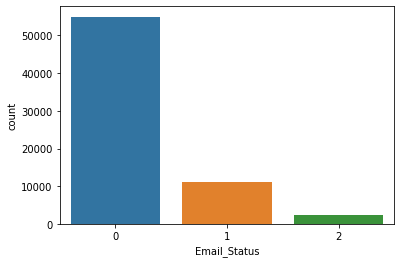

In [29]:
sns.countplot(email_df['Email_Status'])

Observations :-  

Email status has 3 classes = 0, 1 , 2

1) class 0 =  means email is ignored by user and it has total 54941 number of mails have been ignored by user.

2) class 1 = means email have been read by uesr and it has values counts of 11039 number of mails in dataframe.

3) class 2 = means email have been aknowledged by user and it has total 2373 number of mails in dataframe.


## ii) By Pairplot 

 Ploting pairplot to check how the features are related with each other.

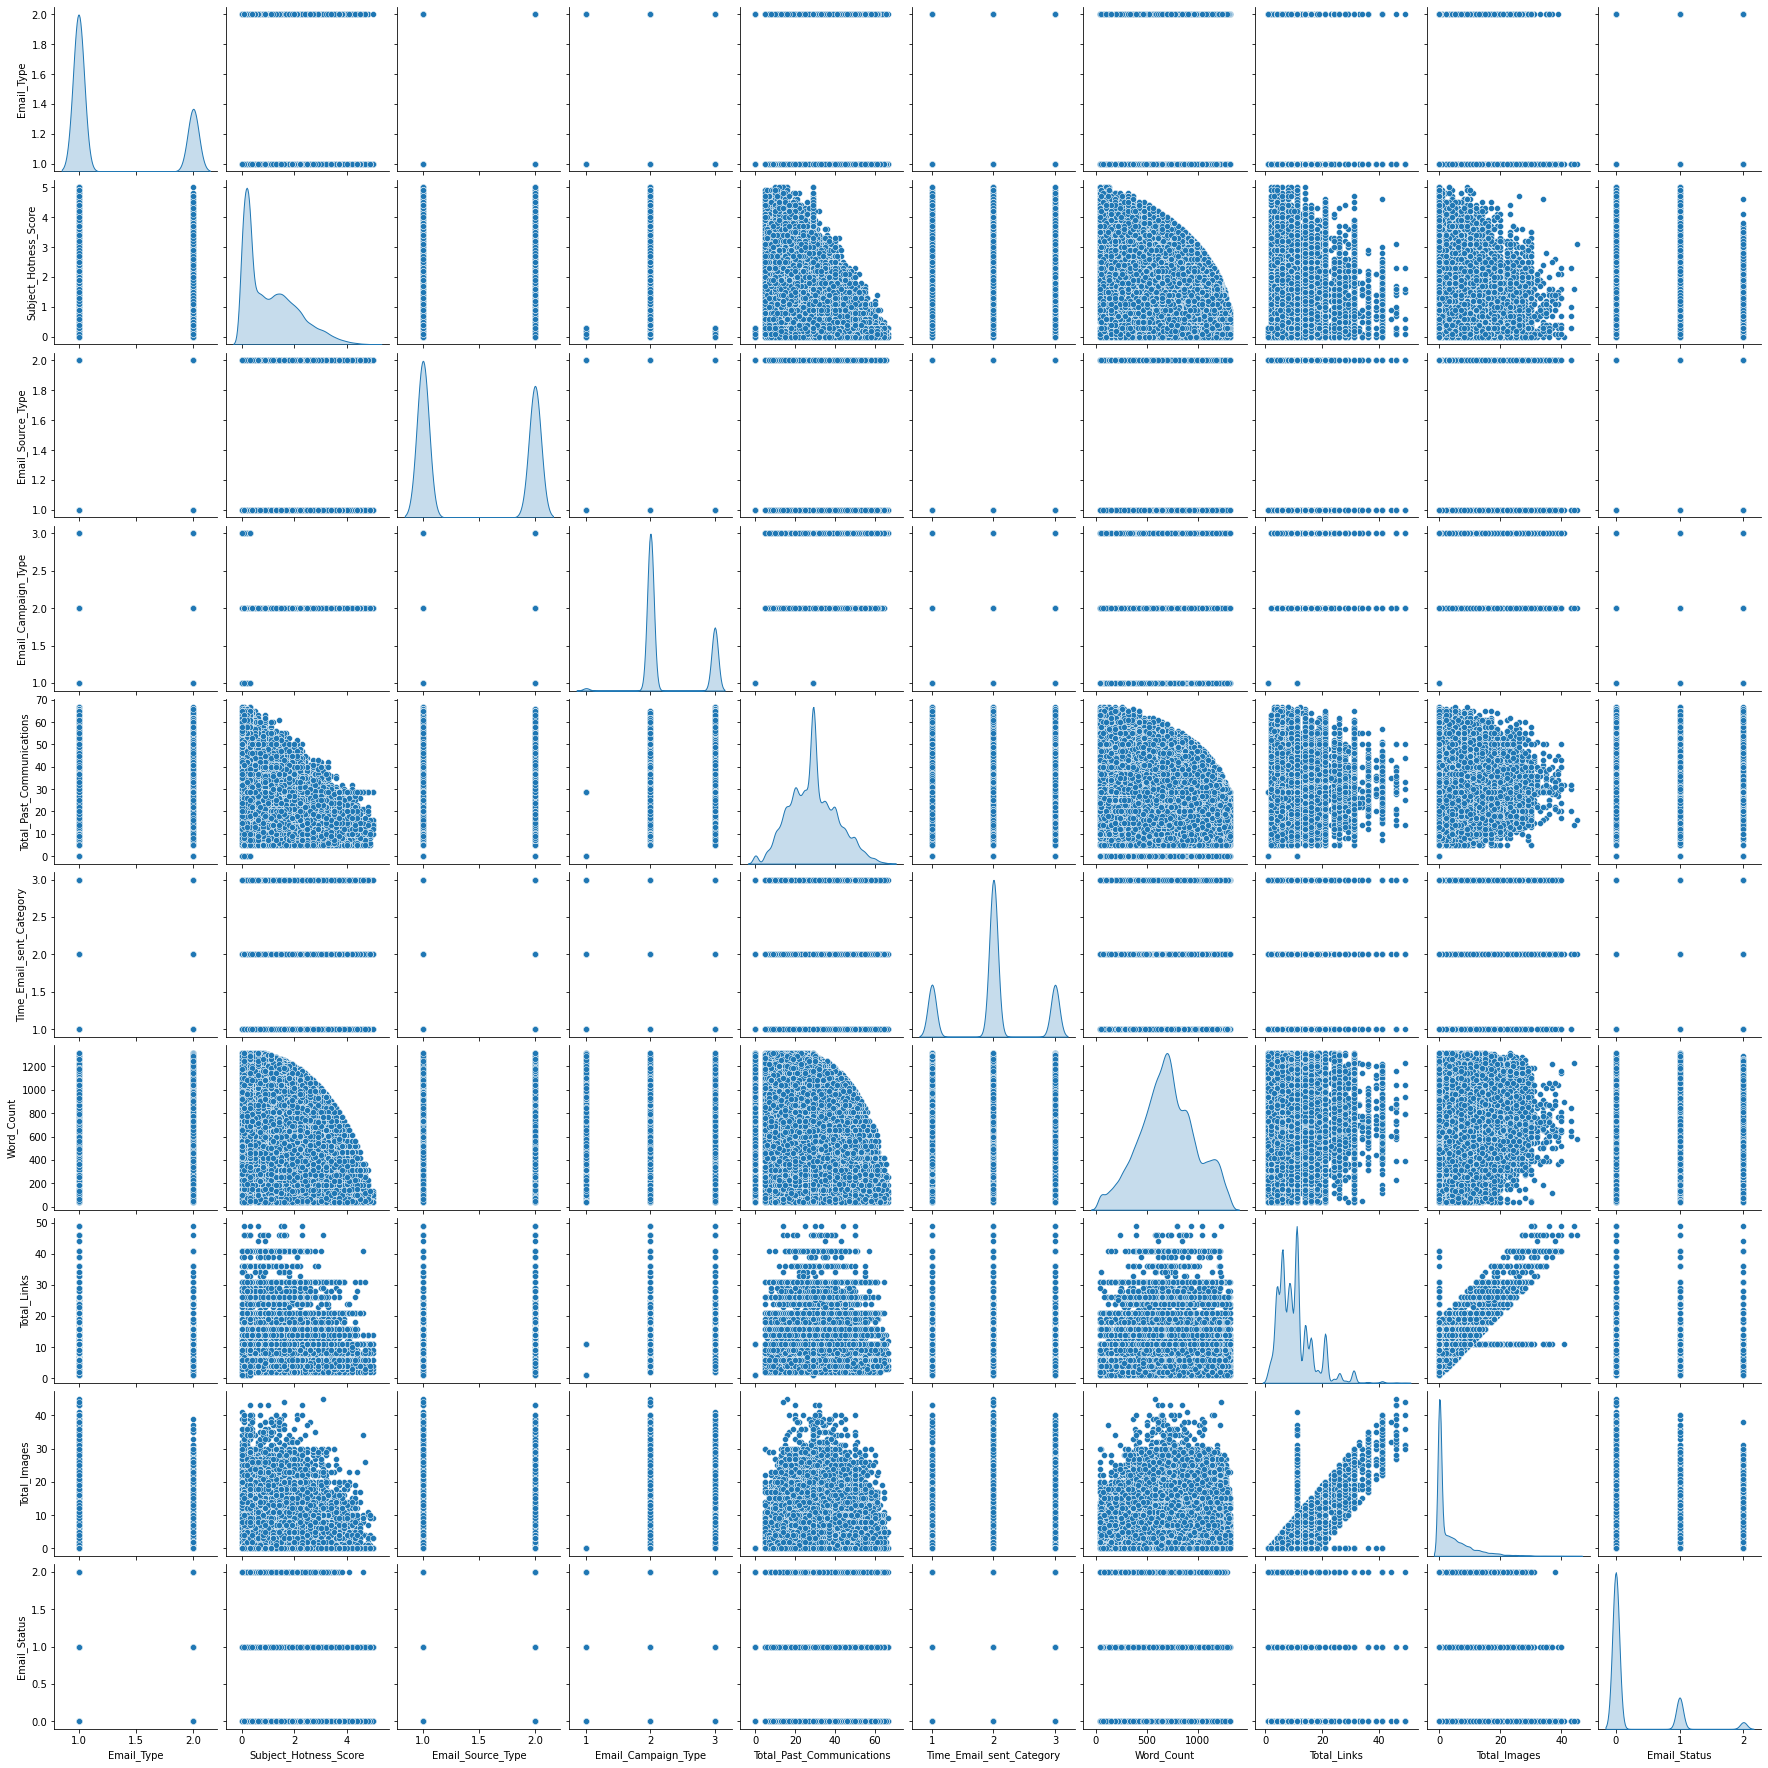

In [30]:
sns.pairplot(email_df, diag_kind = 'kde')                ## Pairplot fo numerical features and categorical features.

# 9) Installing sweetviz library for beautiful visualization

In [31]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 60.8 MB/s eta 0:00:00


In [32]:
import sweetviz as sw
sweet_report = sw.analyze(email_df)

                                             |          | [  0%]   00:00 -> (? left)


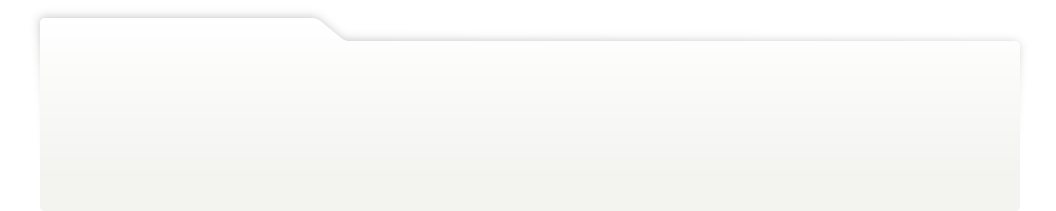
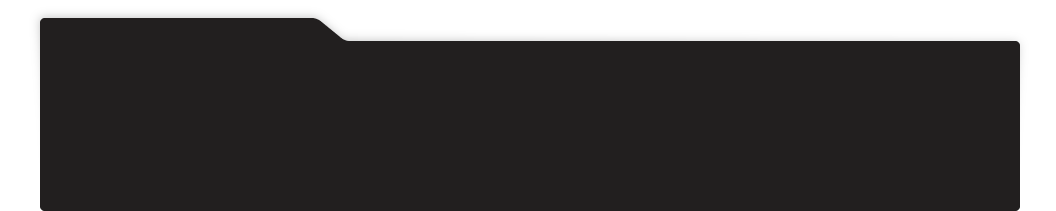
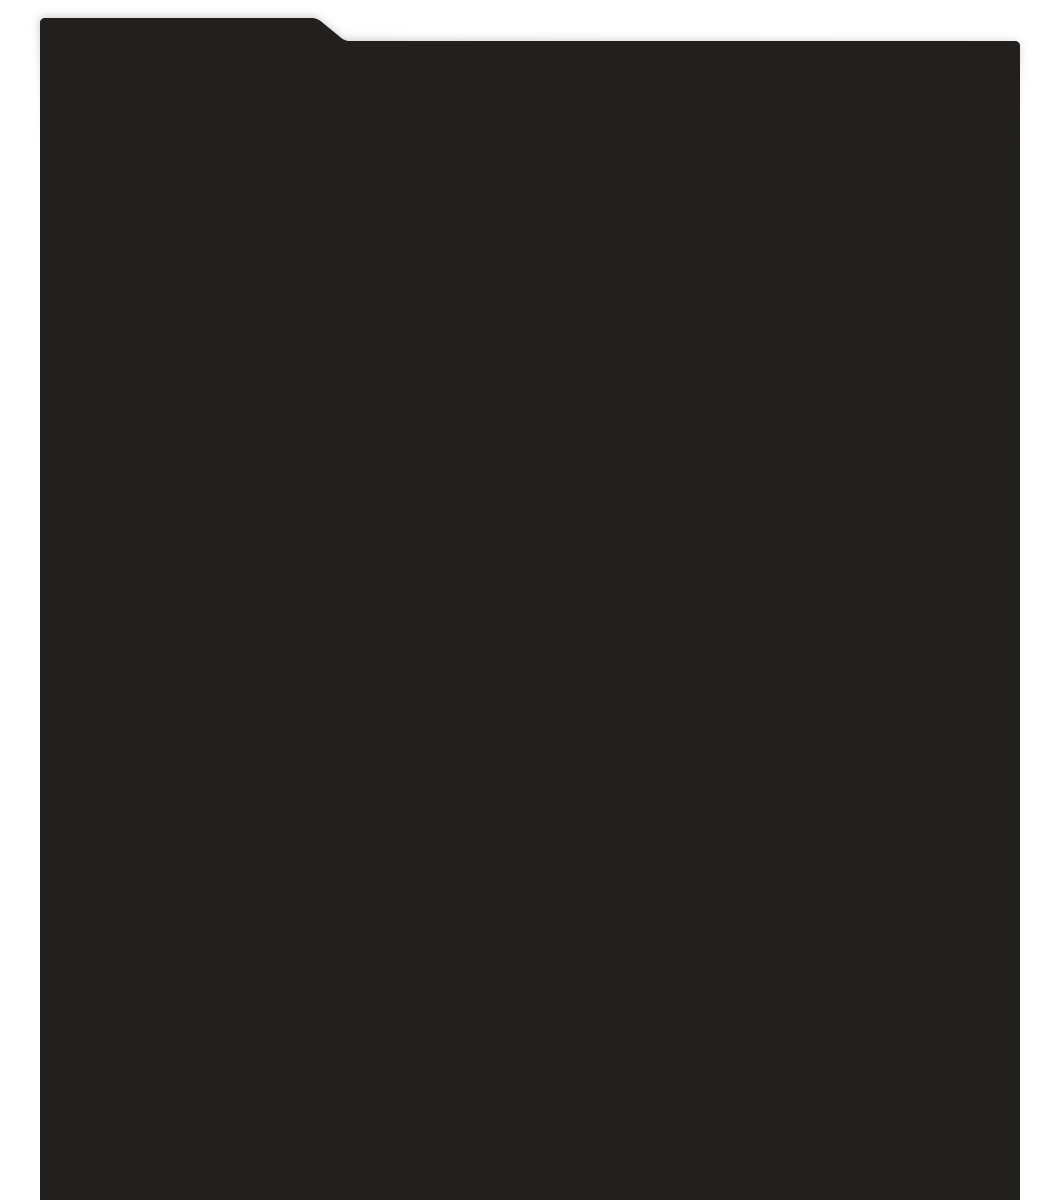
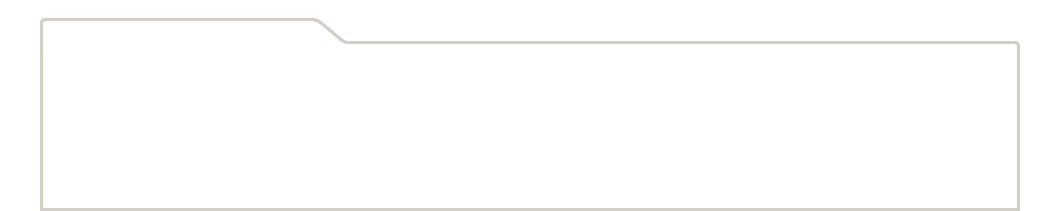
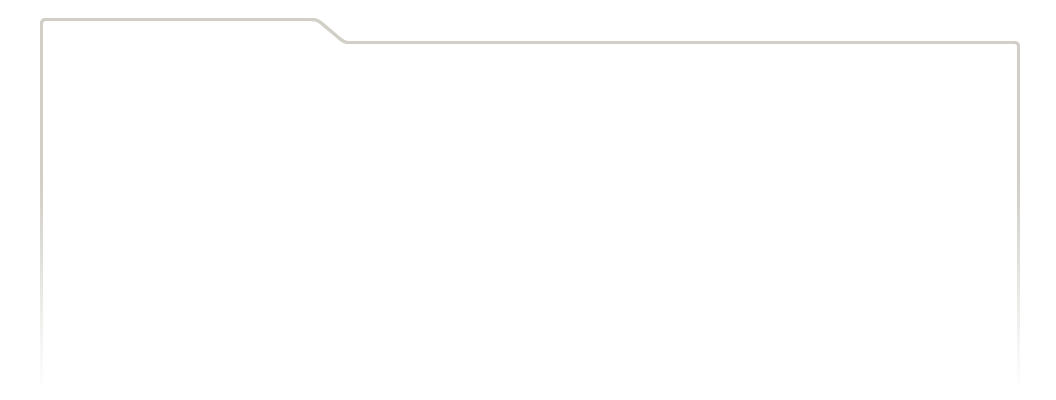
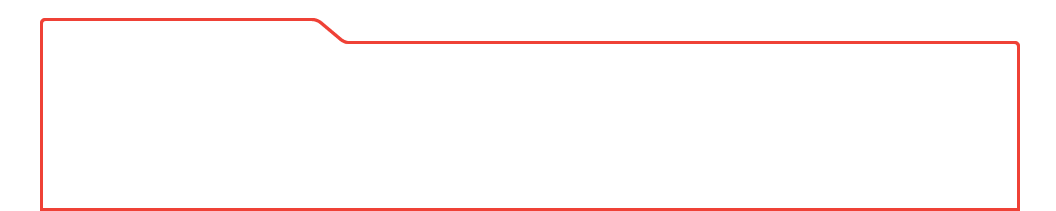
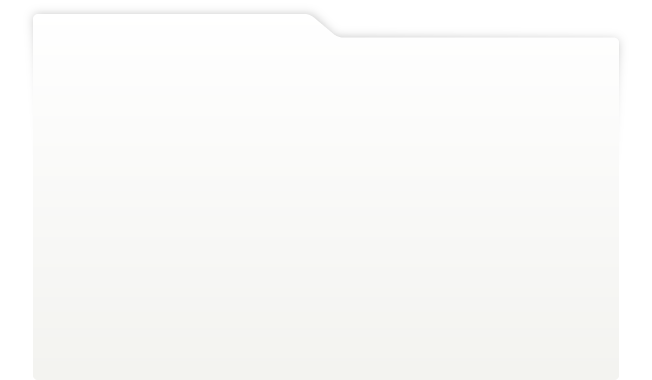
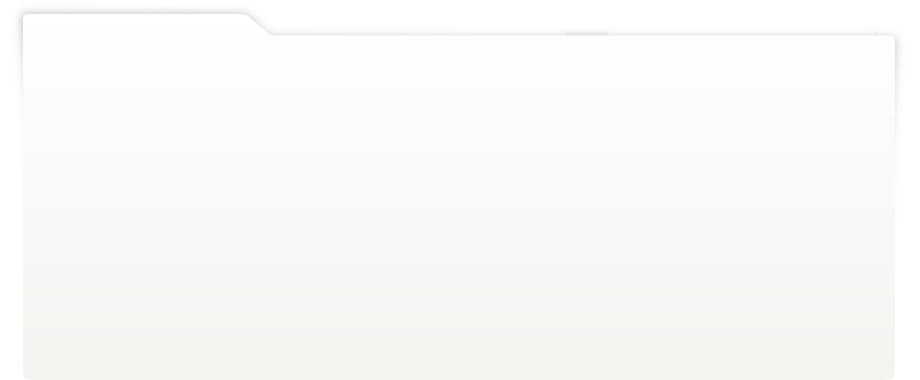
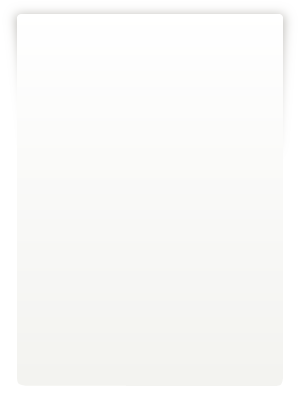
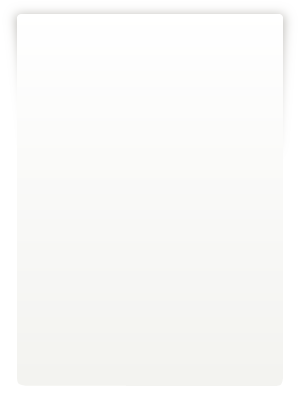
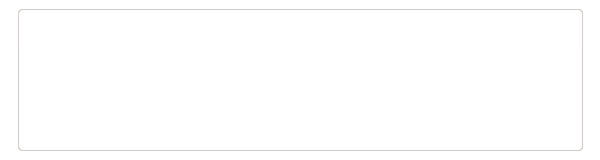
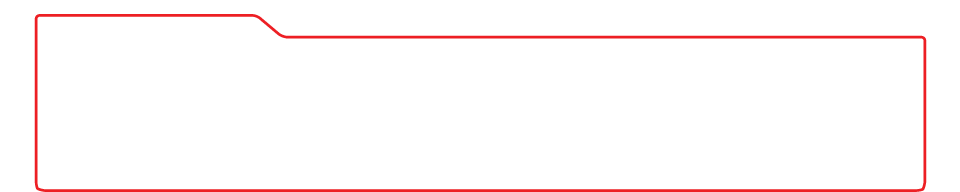
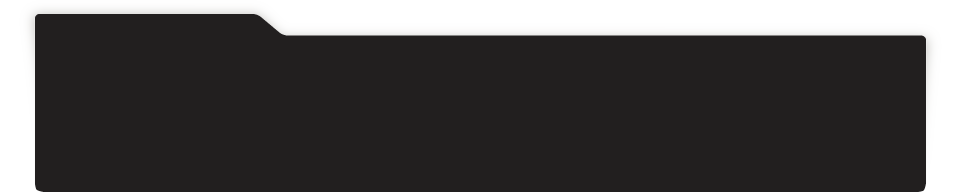
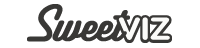
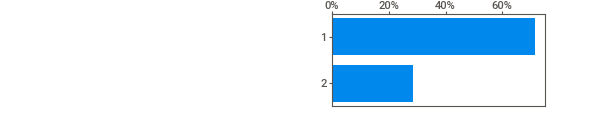
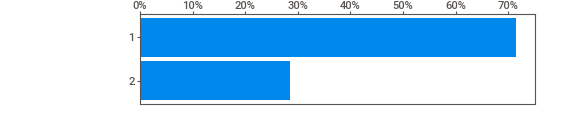
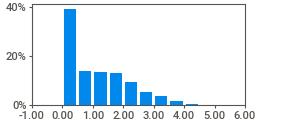
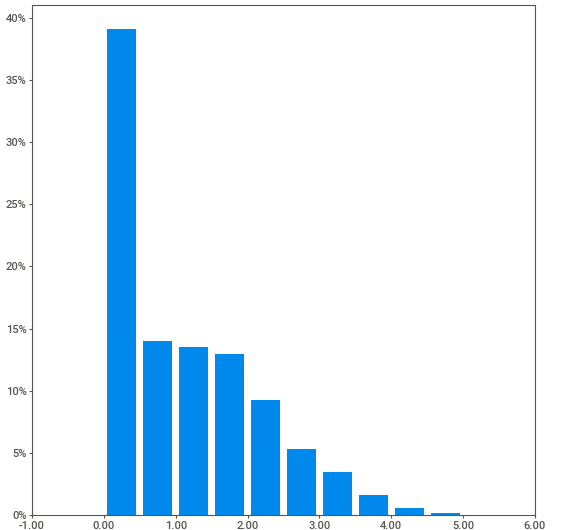
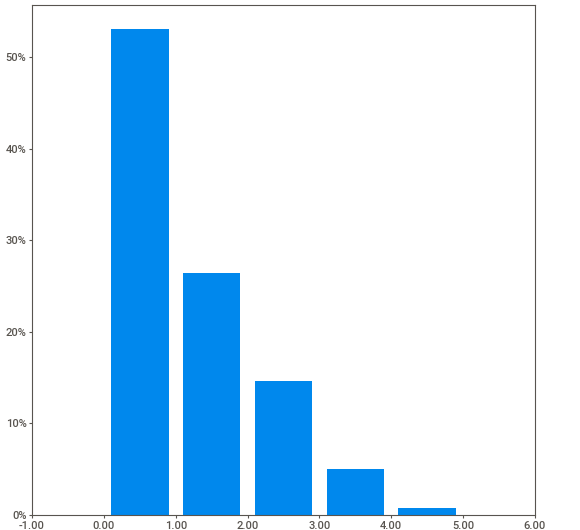
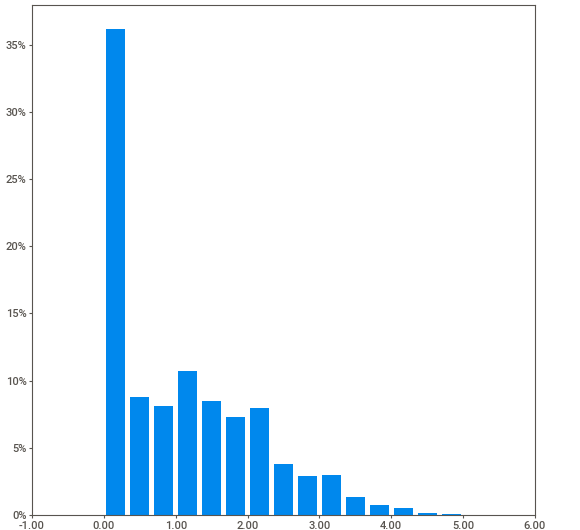
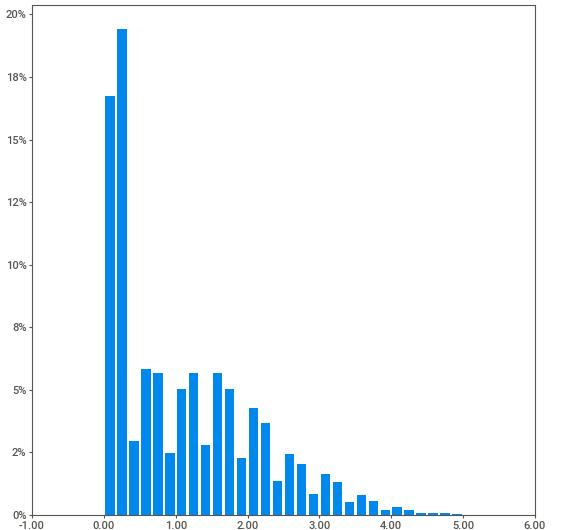
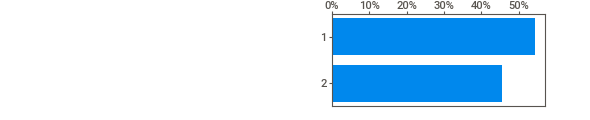
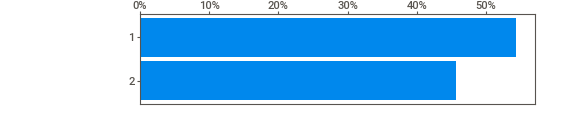
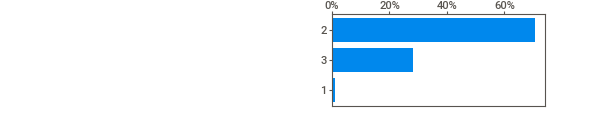
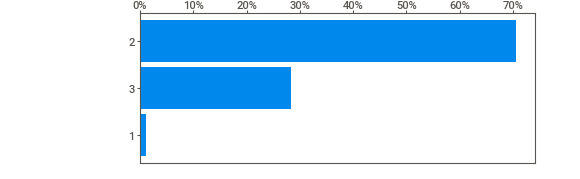
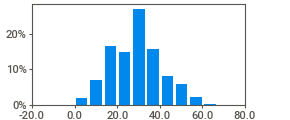
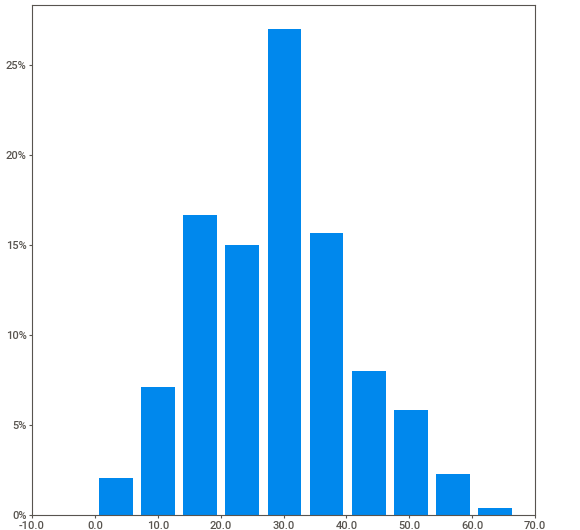
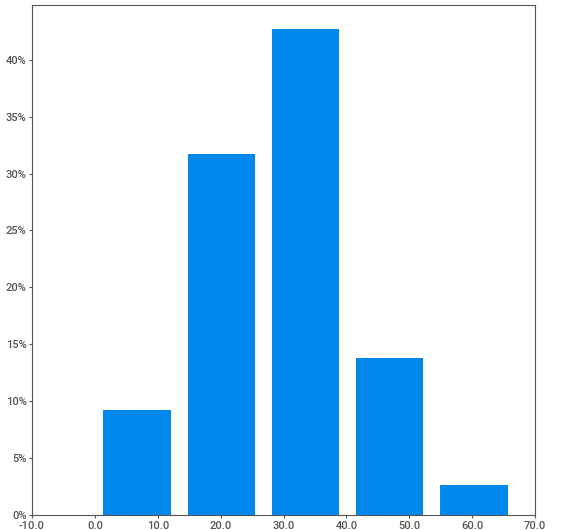
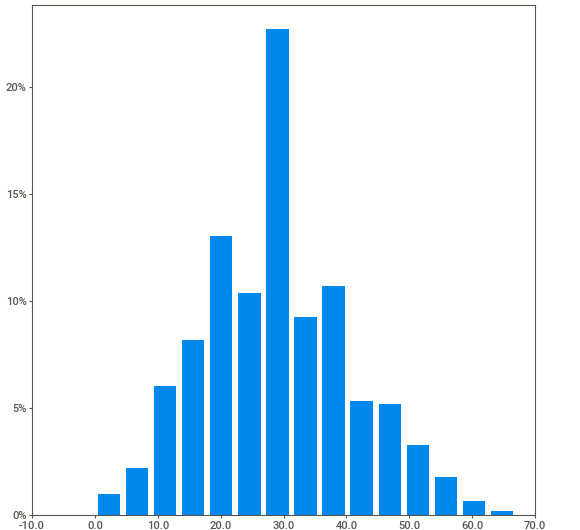
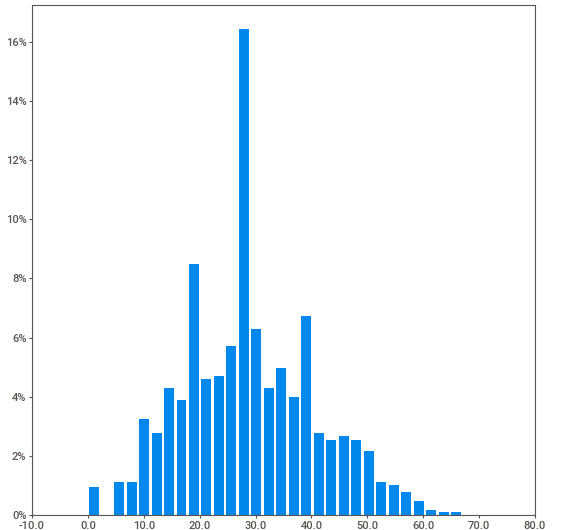
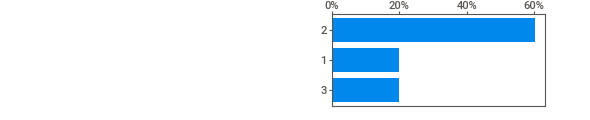
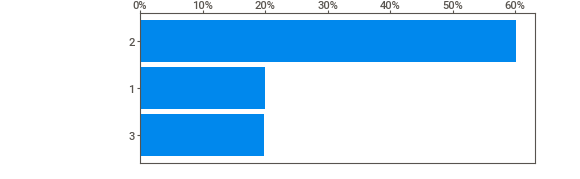
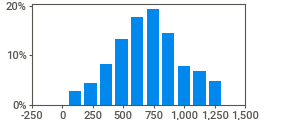
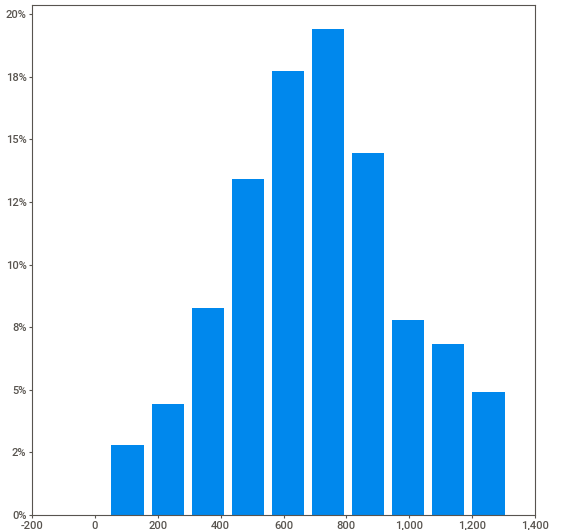
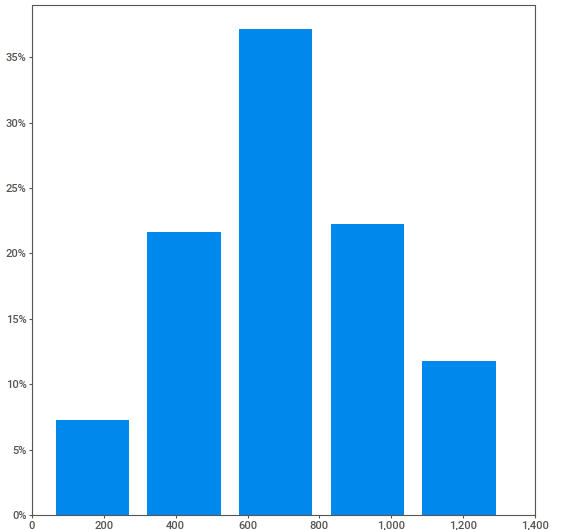
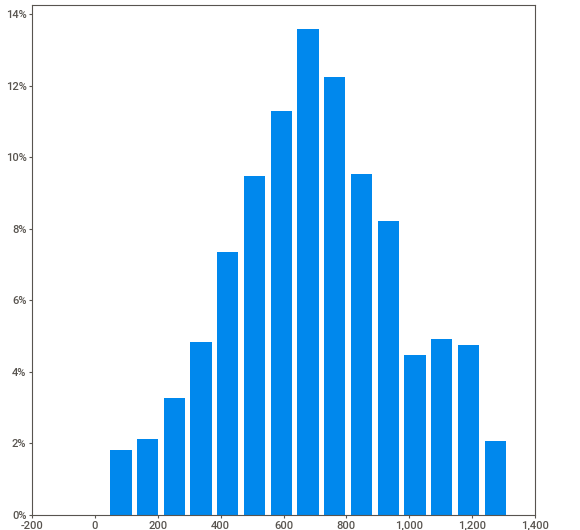
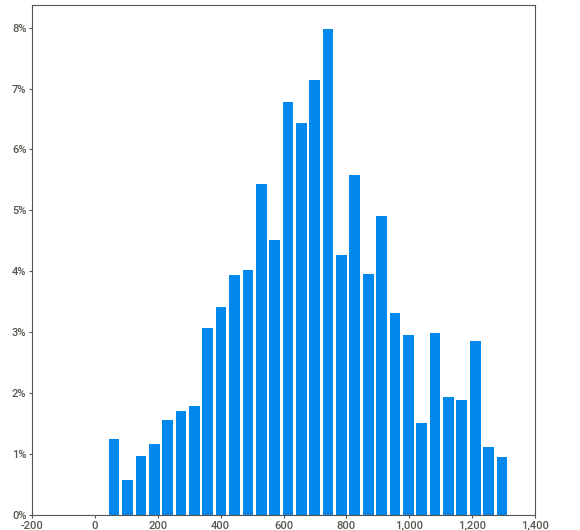
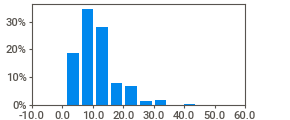
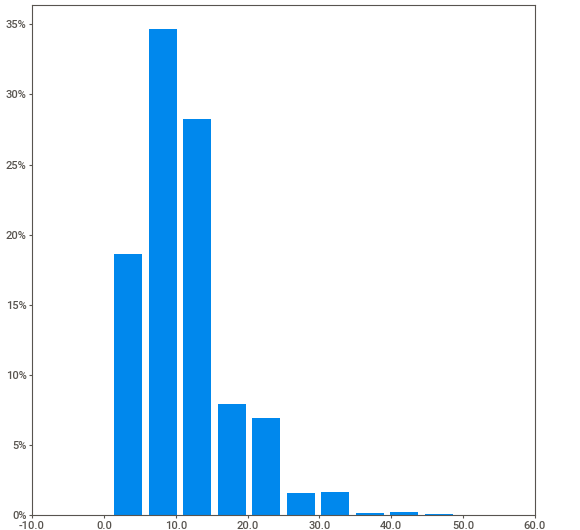
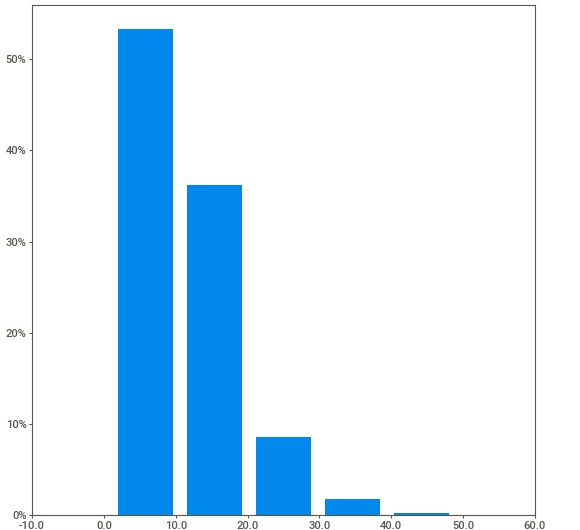
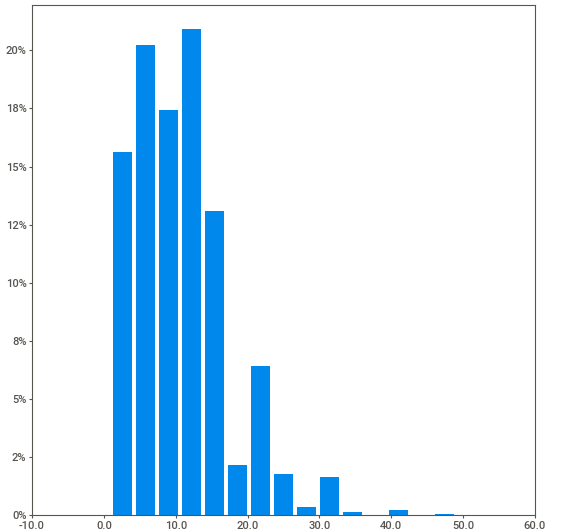
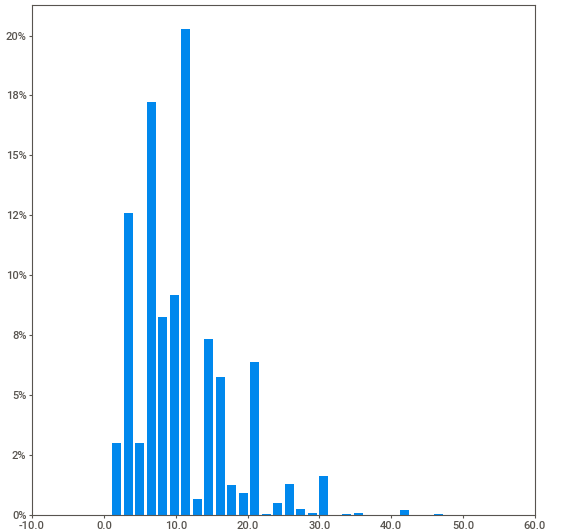
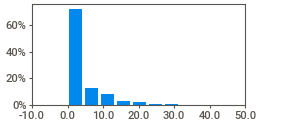
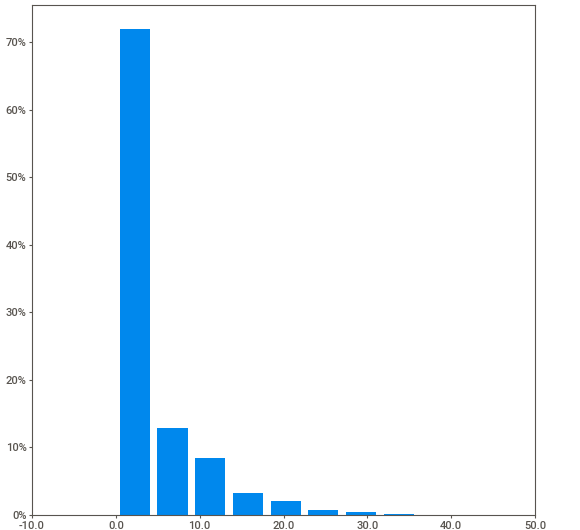
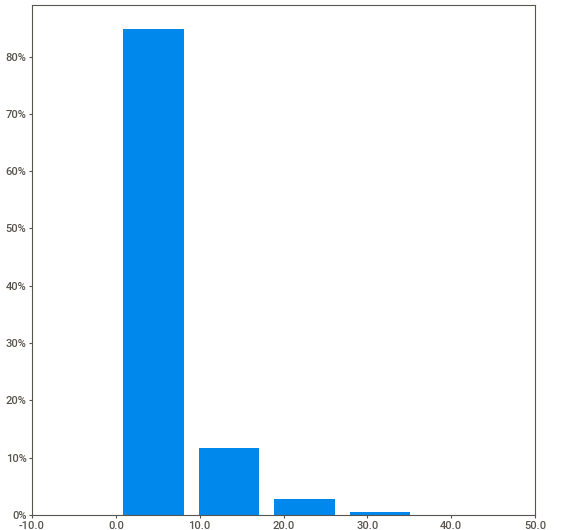
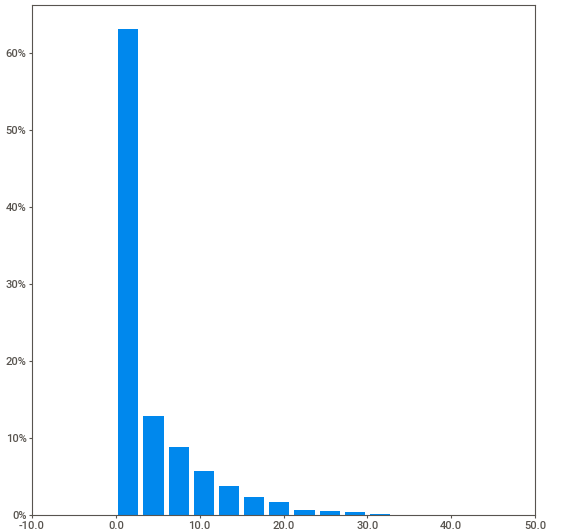
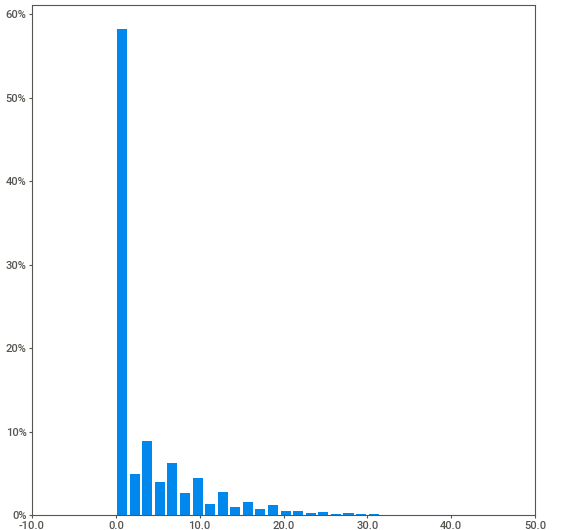
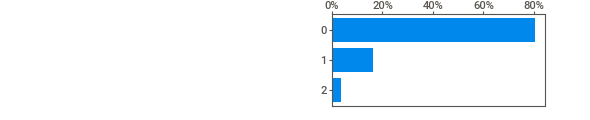
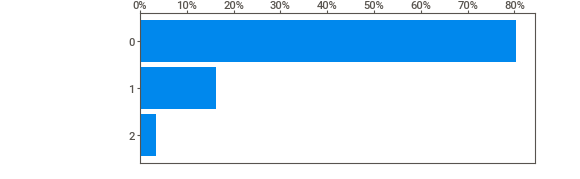
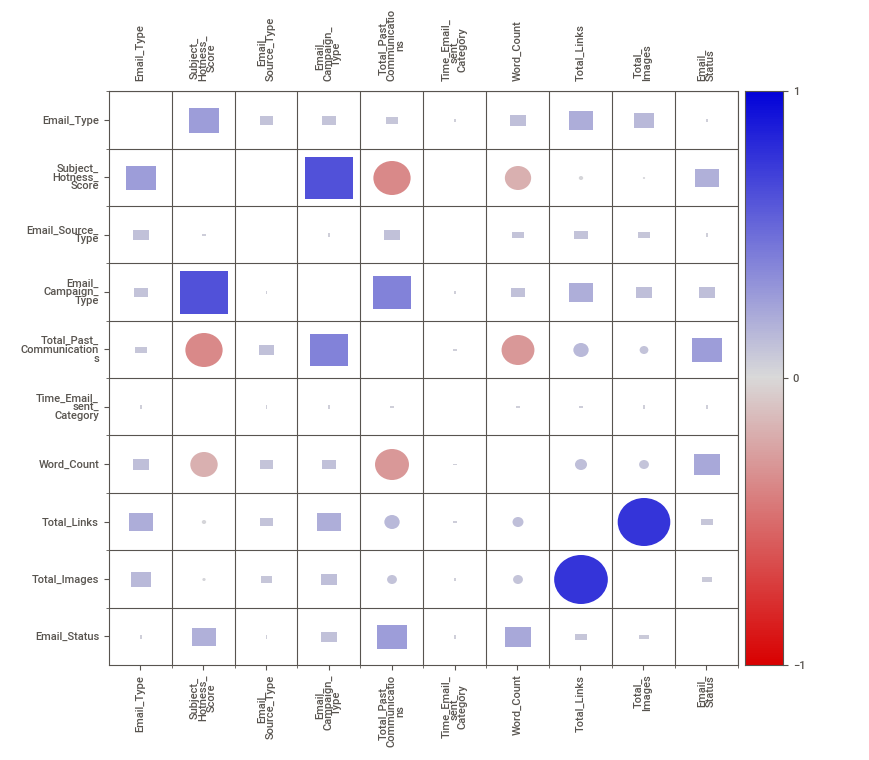
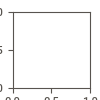

In [33]:
sweet_report.show_notebook()

As from above output we get good visualization of features.

# 10) Creating separate dataframe of numerical and categorical features for better analysis

In [34]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Email_Campaign_Type        68353 non-null  int64  
 5   Total_Past_Communications  68353 non-null  float64
 6   Time_Email_sent_Category   68353 non-null  int64  
 7   Word_Count                 68353 non-null  int64  
 8   Total_Links                68353 non-null  float64
 9   Total_Images               68353 non-null  float64
 10  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 5.7+ MB


Since In dataframe after feature engineering and treatment of null values there are total 11 features. 

out of them 4 are float datatype , 6 are integer datatype, and 1 is object datatype.

but by observing carefully we see that those features has int datatypes are actually binary variables or classical variables so we can treat them as categorical features.

In [35]:
categorical_features = email_df.describe(include = ['object', 'int']).columns

In [36]:
numerical_features = email_df.describe(include=['float']).columns

In [37]:
categorical_features

Index(['Email_ID', 'Email_Type', 'Email_Source_Type', 'Email_Campaign_Type',
       'Time_Email_sent_Category', 'Word_Count', 'Email_Status'],
      dtype='object')

In [38]:
numerical_features

Index(['Subject_Hotness_Score', 'Total_Past_Communications', 'Total_Links',
       'Total_Images'],
      dtype='object')

Now storing these features into dataframe

---> Categorical Dataframe

In [39]:
cat_df = email_df.select_dtypes(include=['object','int']).copy()

In [40]:
cat_df.head()

,Email_ID,Email_Type,Email_Source_Type,Email_Campaign_Type,Time_Email_sent_Category,Word_Count,Email_Status
0,EMA00081000034500,1,2,2,1,440,0
1,EMA00081000045360,2,1,2,2,504,0
2,EMA00081000066290,2,1,3,2,962,1
3,EMA00081000076560,1,2,2,2,610,0
4,EMA00081000109720,1,2,3,2,947,0


In [41]:
#dropping Word_Count column  because it's numeric data
cat_df.drop('Word_Count',axis=1,inplace=True)

In [42]:
cat_df.head(2)

,Email_ID,Email_Type,Email_Source_Type,Email_Campaign_Type,Time_Email_sent_Category,Email_Status
0,EMA00081000034500,1,2,2,1,0
1,EMA00081000045360,2,1,2,2,0


----> Numerical Dataframe

In [43]:
num_df = email_df.select_dtypes(include=['float']).copy()

In [44]:
num_df.head()

,Subject_Hotness_Score,Total_Past_Communications,Total_Links,Total_Images
0,2.20 %,33.00 %,8.00 %,0.00 %
1,2.10 %,15.00 %,5.00 %,0.00 %
2,0.10 %,36.00 %,5.00 %,0.00 %
3,3.00 %,25.00 %,16.00 %,0.00 %
4,0.00 %,18.00 %,4.00 %,0.00 %


# 11) Analysis of categorical features

In [45]:
cat_df.head()

,Email_ID,Email_Type,Email_Source_Type,Email_Campaign_Type,Time_Email_sent_Category,Email_Status
0,EMA00081000034500,1,2,2,1,0
1,EMA00081000045360,2,1,2,2,0
2,EMA00081000066290,2,1,3,2,1
3,EMA00081000076560,1,2,2,2,0
4,EMA00081000109720,1,2,3,2,0


In [46]:
cat_df.isnull().sum()                 # Since we have already handelled null values of all features of email_df 

Email_ID                    0
Email_Type                  0
Email_Source_Type           0
Email_Campaign_Type         0
Time_Email_sent_Category    0
Email_Status                0
dtype: int64

In [47]:
# dropping Email_Id column becoz it does'nt giving any other information than id.
cat_df.drop(['Email_ID'],axis=1, inplace=True)

In [48]:
cat_df.columns

Index(['Email_Type', 'Email_Source_Type', 'Email_Campaign_Type',
       'Time_Email_sent_Category', 'Email_Status'],
      dtype='object')

In [49]:
list(cat_df.columns)

['Email_Type',
 'Email_Source_Type',
 'Email_Campaign_Type',
 'Time_Email_sent_Category',
 'Email_Status']

# i) Checking distribution of categorical features

In [50]:
cat_df['Email_Status'].value_counts()

0    54941
1    11039
2     2373
Name: Email_Status, dtype: int64

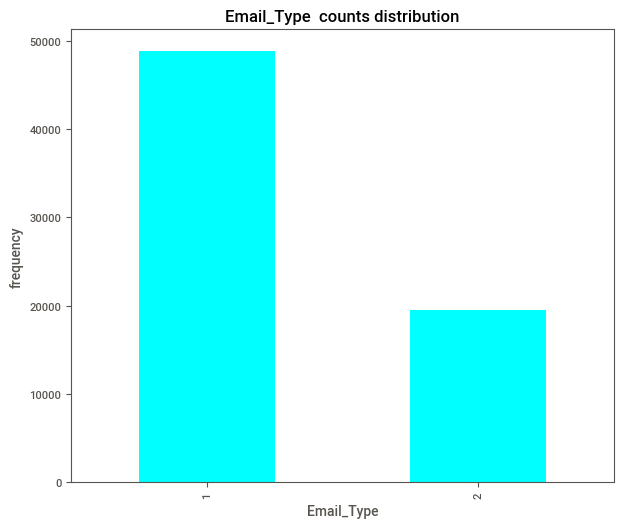

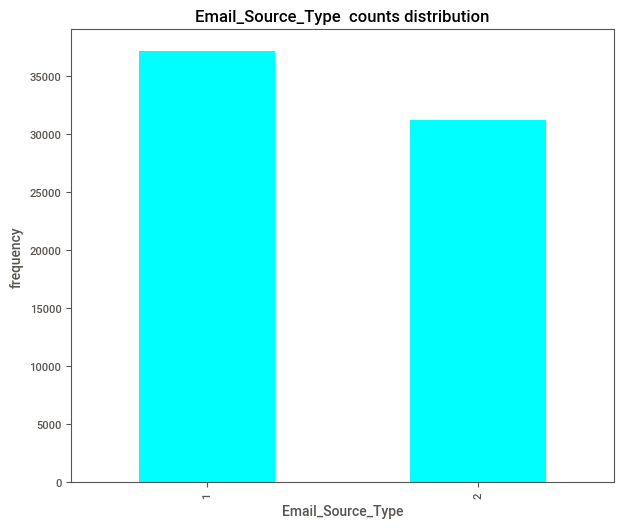

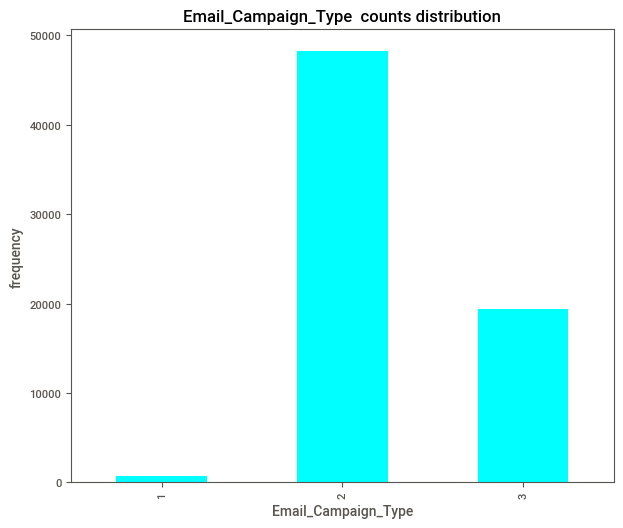

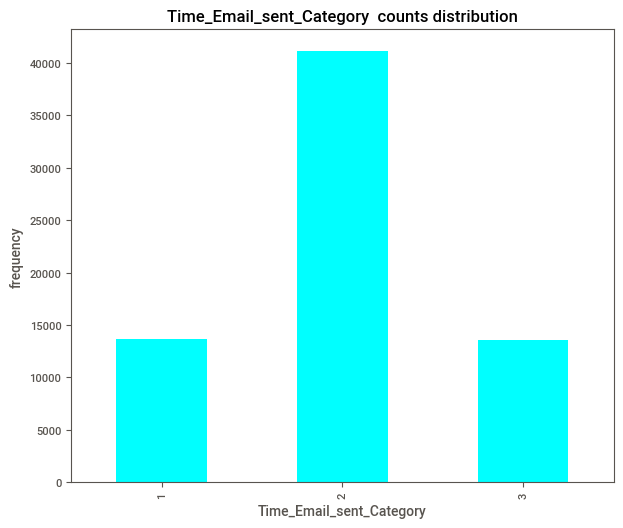

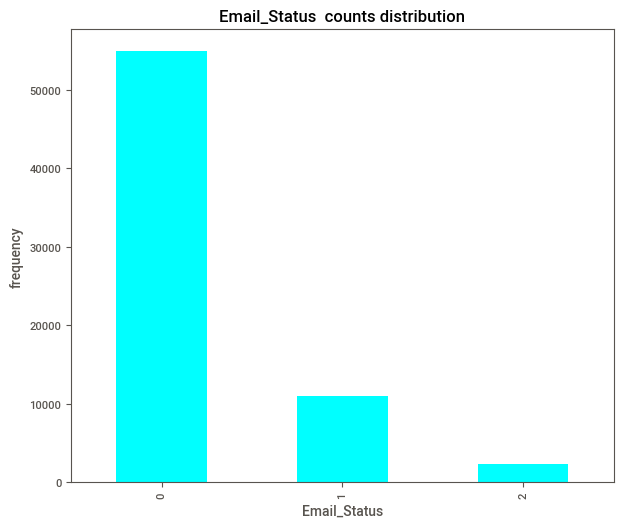

In [51]:
for col in list(cat_df.columns):
  counts = cat_df[col].value_counts().sort_index()
  fig = plt.figure(figsize=(7,6))
  ax = fig.gca()                                         ## gca - to get current axis
  counts.plot.bar(ax=ax,color='cyan')
  ax.set_title(col+'  counts distribution')
  ax.set_xlabel(col)
  ax.set_ylabel('frequency')

plt.show()

Observations : After we treating null values and dropping unnecesssary features. we see that 

1) Email_type feature has 2 categories out of these 

:- type 1 is may be for marketing mail or imp updates has 48866 number of mails in our dataset. 

:- type 2 is for notices for regarding buisness sent by verious companies has 19487 number of mails present in our dataset.

2) Email_source_type also has 2 categories and is quite well balanced feature.

:- source type 1 has value counts of mails are 37149 

:- source type 2 has value counts of mails are     31204

3) Email_campaign type has 3 categories and quite imbalanced data 

:- campaign 1 has mail counts are 736

:- campaign type 2 has mail counts of 48273

:- campaign type 3 has mail counts of 19344

4) Time_Email_sent_category has 3 categories 

:- category 1 = Morning slot has 13636 number of mails recieved

:- category 2 = Evening slot has 41129 number of mails recieved

:- category 3 = Night slot has 13588 number of mails recieved. 

5) Email_status is our dependent feature it has 3 classes

:- class 0 = is for ignored emails , And 54941 emails have been ignored by users in our dataset

:- class 1 = is for Read emails, and total 11039 mails has been read by users.

:- class 3 = is for aknowledged mails,and total 2373 mails have been aknowledged by users whihc is quite small number as compare to total mail recieved.
 



## ii) checking dependancy of categorical features wrt dependent variable (Email_Status) 

In [52]:
cat_df.head(2)

,Email_Type,Email_Source_Type,Email_Campaign_Type,Time_Email_sent_Category,Email_Status
0,1,2,2,1,0
1,2,1,2,2,0


In [53]:
# Defining function as bar percentage 

def barperc(df, Xvar, ax):
  '''barperc : adding percentage to hues to bar plots
  arguments : 
  df: dataframe , here categorical dataframe
  Xvar : X Variables or categorical features on 
  ax : axes object (for seaborn countplot) '''

  # 1) Checking how many X variables we have 
  ## Firstly checking null values if present then removing, Since we have treated all the nulll values but cross calidating again
  num_of_X = len([X for X in df[Xvar].unique() if X==X])

  # 2) Then creating Bars in hue order, and organizing them 
  bars = ax.patches
  
  # 3) for each X variables
  for index  in range(num_of_X):
    # 4) to get hue bars for all features
    hue_bars= bars[index:][::num_of_X]
    # 5) To get total height of bars in %
    total = sum([X.get_height() for X in hue_bars])

    # 6) to print the % on bar
    for bar in hue_bars:
      ax.text(bar.get_x()+bar.get_width()/2.0, bar.get_height(),
              f'{bar.get_height()/total:0.0%}', ha = 'center', va = 'bottom')

observations :- Meaning of above defined function.

This is a Python function that adds percentage labels to the bars of a Seaborn countplot. A countplot is a bar plot that shows the count of observations in each categorical bin using bars. The function takes three arguments: a pandas dataframe, a string representing the X variable, and an Axes object representing a Seaborn Countplot.

The function first determines the number of unique X categories in the dataframe by removing any NaN values. Then, it organizes the bars in hue order for each X variable, calculates the total height of the hue bars, and adds the percentage labels on top of each bar using the Axes object's text method.

Overall, this function is useful for adding percentage labels to the bars of a countplot, which can help to better communicate the distribution of data within each category.

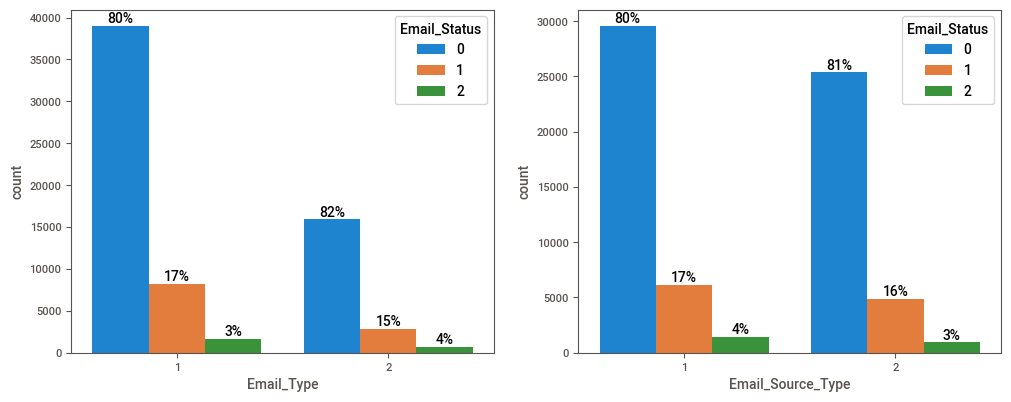

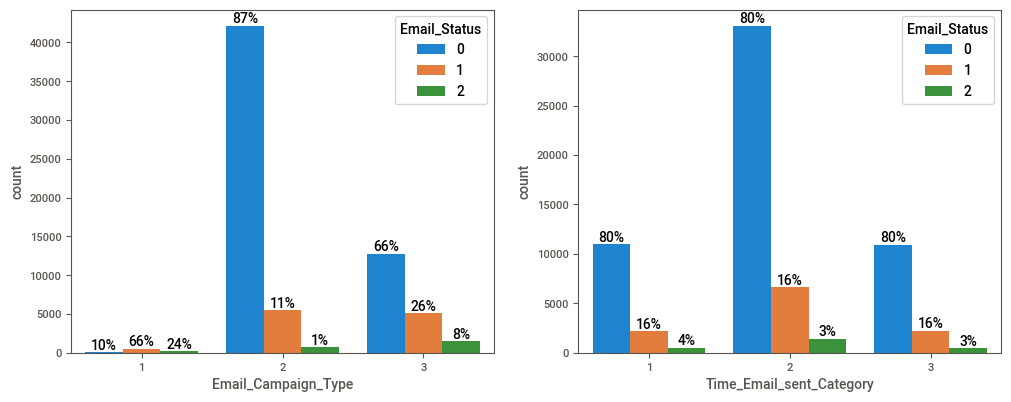

<Figure size 1200x1000 with 0 Axes>

In [54]:
 ## Applying barperc function on dataframe  

n = 1   ## let number of X variable be 1

fig = plt.figure(figsize=(12,10))
for column in list(cat_df.columns) :
  if  n < 3:
    if column != 'Email_Status':
      ax1 = fig.add_subplot(2,2,n)
      sns.countplot(data= cat_df, x = column, hue = 'Email_Status', ax=ax1) 
      barperc(cat_df, column, ax1)

  n = n+1
  if n==3:
   fig = plt.figure(figsize= (12,10))
   n=1



  
  


  


Observations :-  From above count plot of all categorical features wrt Email_status we clear that 

1) Email_Type has 2 categories 1 and 2

type 1 :  has 80% of mails are ignored by  users, 17% mails are read by users and 3% mails are aknowledged by peoples.

for type 2 mails : 82% mails are ignored , 15% mails are read, and 4% mails are aknowledged by peoples.

2) Email_source_type features also has 2 types 

source_type 1 :  80% mails has been ignored, 17% mails are read, and 4% mails have been aknowlwdged by users.

source type 2 :  81% mails has been ignored , 16% mails are read, and 3% mails have been aknowledged by users.

3) Email_campaign_type features has 3 categories :    

campaign type 1 : 10% mails are ignored, 66% mails are read, and 24% mails are aknowledged by users.

campaign type 2 : 87% mails are ignored, 11% mails are read, and only 1% mails are aknowledged by users.

4) Time_email_sent_category has 3 category

category 1 = for morning slot : 80% mails are ignored, 16% mails are read, and 4% mails are aknowledged.

category 2 = for evening slot : 80% mails are ignored , 16% mails are read, and 3% mails are aknowledged by users.

category 3 = for night slots: 80% mails are ignored, 16% mails are read, 3% mails are aknowledged by users.

## iii) Checking correlation between categorical features wrt dependent variable.

<AxesSubplot:>

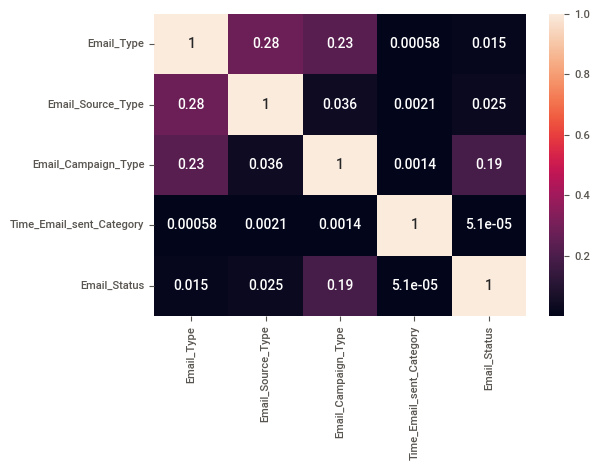

In [55]:
sns.heatmap(abs(cat_df.corr()), annot=True)

Observations :-  
By observing above correlation heatmap we clearly say that some of the categorical features have less correlation with our dependent feature (Email_Status).

----> Up till now we have make analysis and visualization of categorical feature.And also we have checked categorical independent features dependancy 
with target variable.

Now its time to analyse numerical features,and let us study there dependency wrt dependent feature.

# 12) Analysis of Numeric features.

In [56]:
num_df.head()

,Subject_Hotness_Score,Total_Past_Communications,Total_Links,Total_Images
0,2.20 %,33.00 %,8.00 %,0.00 %
1,2.10 %,15.00 %,5.00 %,0.00 %
2,0.10 %,36.00 %,5.00 %,0.00 %
3,3.00 %,25.00 %,16.00 %,0.00 %
4,0.00 %,18.00 %,4.00 %,0.00 %


Since we have dropped "world_count" feature from categorica dataframe becoz it is numerica feature so we have to add it into numeric datframe

In [57]:
num_df['Word_Count'] = email_df.loc[num_df.index,'Word_Count'].copy()

In [58]:
num_df.head()

,Subject_Hotness_Score,Total_Past_Communications,Total_Links,Total_Images,Word_Count
0,2.20 %,33.00 %,8.00 %,0.00 %,440
1,2.10 %,15.00 %,5.00 %,0.00 %,504
2,0.10 %,36.00 %,5.00 %,0.00 %,962
3,3.00 %,25.00 %,16.00 %,0.00 %,610
4,0.00 %,18.00 %,4.00 %,0.00 %,947


Now we have final Numeric dataframe and we are good to go for data visualization and data analysis.

## i) Checking Distribution of numerical features.

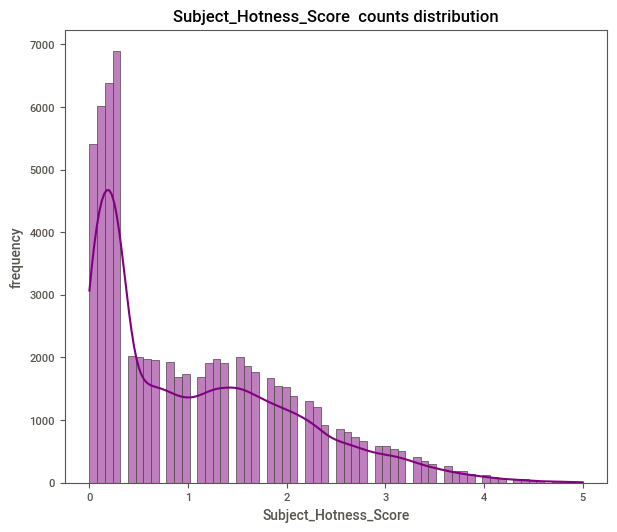

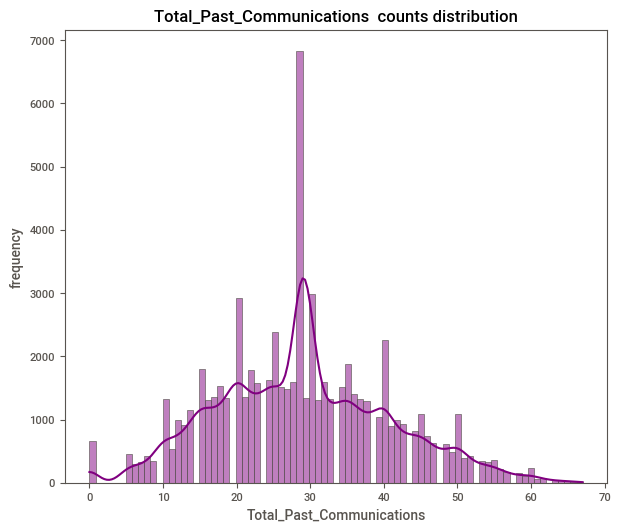

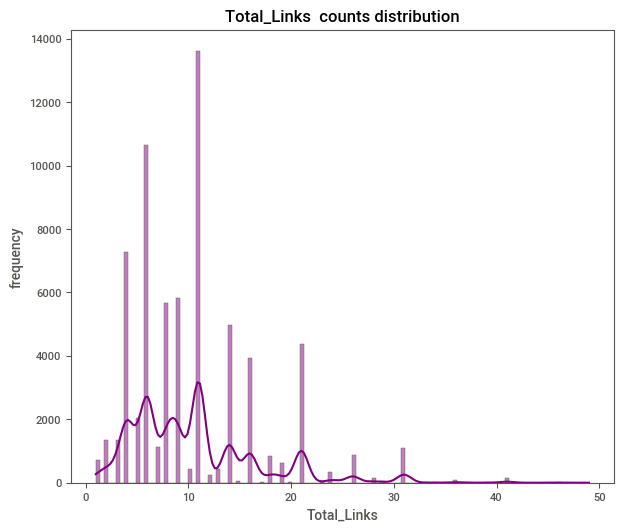

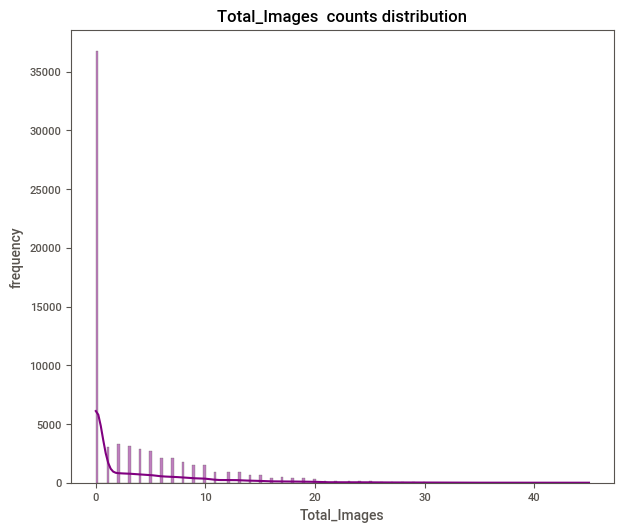

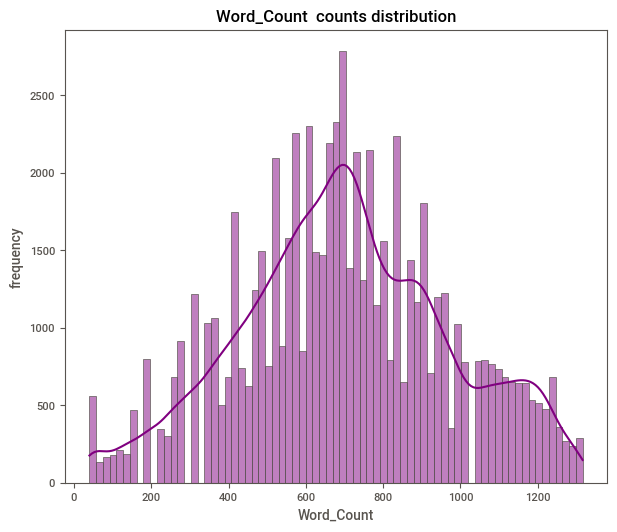

In [59]:
for col in list(num_df.columns):
  
  fig = plt.figure(figsize=(7,6))
  ax = fig.gca()                                         ## gca - to get current axis
  num_features = num_df[col]
  sns.histplot(data=num_df, x = col, ax=ax, color='purple', kde = True)
  ax.set_title(col+'  counts distribution')
  ax.set_xlabel(col)
  ax.set_ylabel('frequency')

plt.show()

Observations :-  

As we see that some numeric features are not normally distributed.

some of them are 

Normally distributed features are = "Total past communication" but there are some outliers present, so we will study later treatment of outliers. And we have Already above treated null values for this normally distributed by replacing missing values by there Mean.
positively skewed features are = "subject hotness score" , "Total links", "Total Images" , "World count", So for this skewed distributiion we have used modes of there features to fill missing values.

## ii) Now checking relationship between independent features here (Numerical features) with dependent feature

Since our dependent variable presennt in categorical dataframe 

So to check dependancy of numeric features wrt Dependent variable we have to add "Email_Status" feature to numeric dataframe.

In [60]:
num_df['Email_Status'] = email_df.loc[num_df.index, 'Email_Status'].copy()

In [61]:
num_df.head(2)

,Subject_Hotness_Score,Total_Past_Communications,Total_Links,Total_Images,Word_Count,Email_Status
0,2.20 %,33.00 %,8.00 %,0.00 %,440,0
1,2.10 %,15.00 %,5.00 %,0.00 %,504,0


In [62]:
list(num_df.columns)

['Subject_Hotness_Score',
 'Total_Past_Communications',
 'Total_Links',
 'Total_Images',
 'Word_Count',
 'Email_Status']

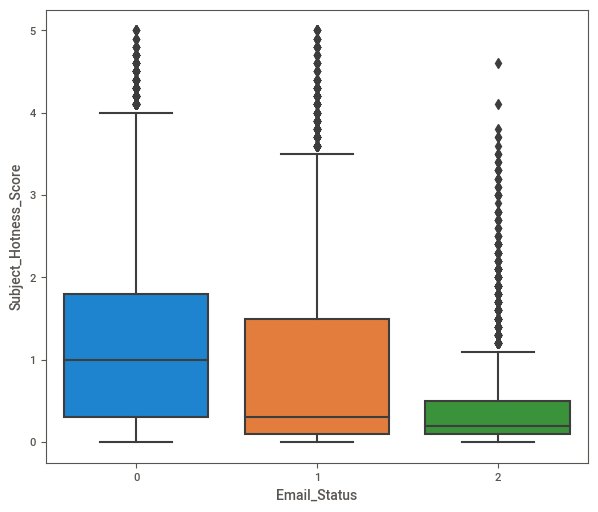

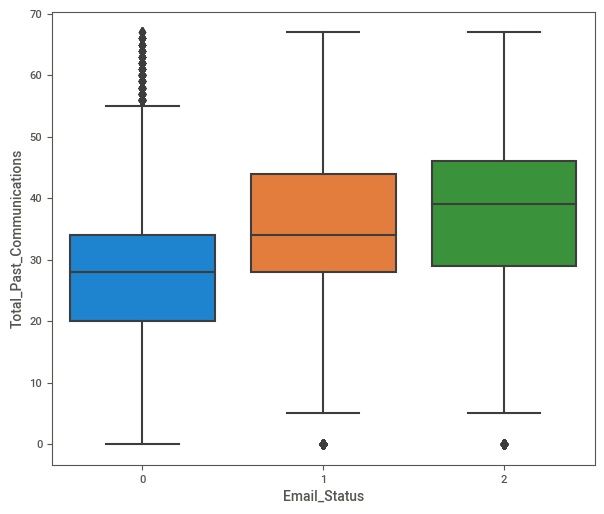

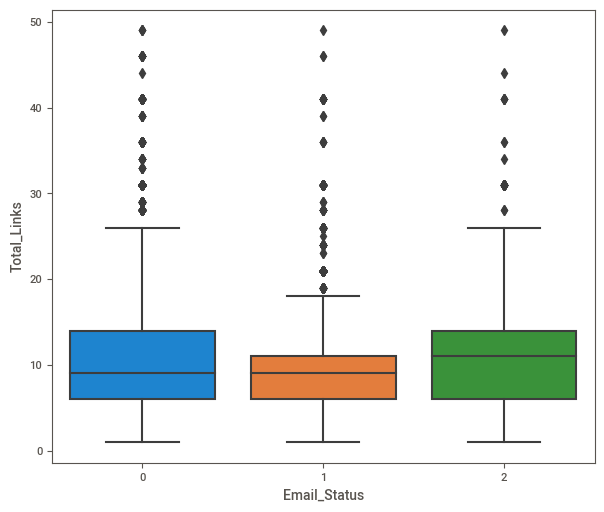

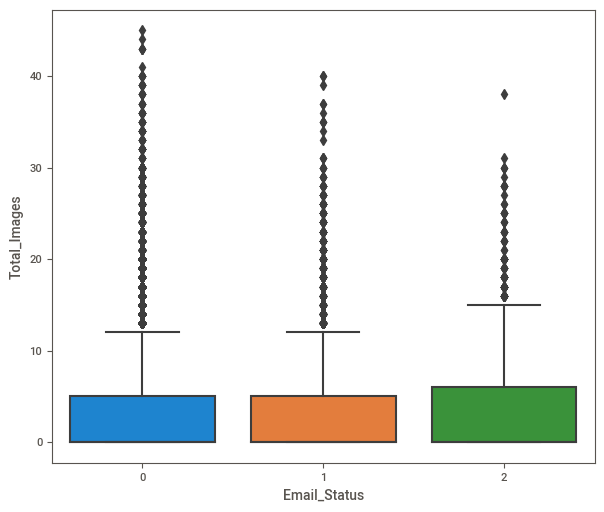

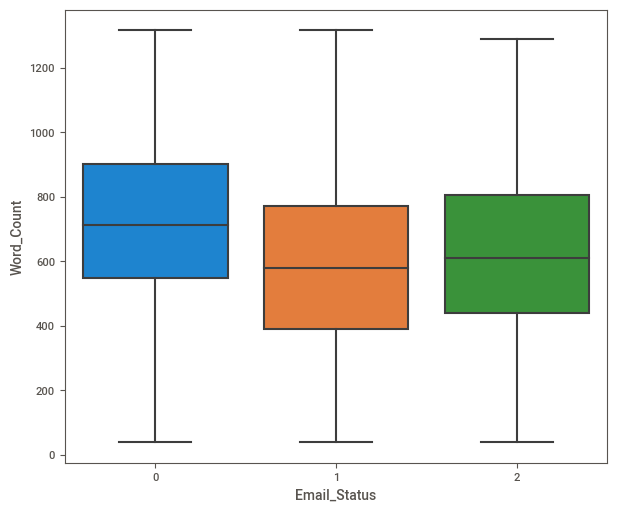

In [63]:
for col in list(num_df.columns)[:5]:
  
  fig = plt.figure(figsize=(7,6))
  ax = fig.gca()                                         ## gca - to get current axis
   
  sns.boxplot(data=num_df, x = 'Email_Status',y=col, ax=ax)


plt.show()

Observations :-  

1) As from boxplot of numeric features wrt dependent features we get better visualization about how these features are distributed and we can see that there are some outliers present in features.

2) Subject_Hotness_Score -> All Email_Status i.e 0,1,2 have outliers. 0 have highest median and 1,2 are right skewed. It is observed that the Subject_Hotness_Score for read/acknowledged mails are much lower.

3) Total_Past_Communications -> for Email_Status 0,1,2 have small outliers and 2 have highest median .

4) Total_Links ->Email_Status 0,1,2 all have outliers,All have the same median but 0 and 2 have higher variance compare to 1.

5) Total_Images ->Email_Status 0,1,2 all have outliers and All have the same median. Hence all the mails have the same range of images.

6) Word_Count ->Median of 0 is highest. Thus we can understand that ignored mails have higher word count.

## iii) Now looking how the Correlation between Numerical features.

In [64]:
num_df.head(2)

,Subject_Hotness_Score,Total_Past_Communications,Total_Links,Total_Images,Word_Count,Email_Status
0,2.20 %,33.00 %,8.00 %,0.00 %,440,0
1,2.10 %,15.00 %,5.00 %,0.00 %,504,0


Since Numeric dataframe contains dependent feature which is actually categorical in nature, so we have to drop Email_Status from num_df.

<AxesSubplot:>

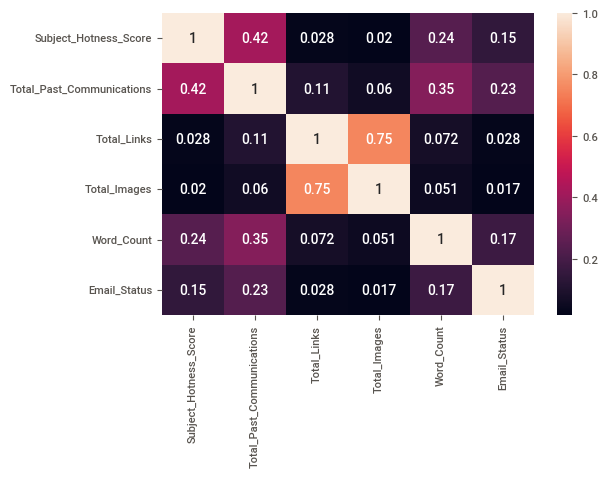

In [65]:
sns.heatmap(abs(num_df.corr()), annot=True)

Observations :-  From above correlation map we see that there is multicollinearity present in independent feature. 

So we will later study how we can remove multicollinearity from features for building ML model.

1) From above heatmap we see that Total_Links feature is highly correlated with Total_Images feature. 

2) And other features are not so much correlated with each others.

# 13) Feature engineering 

## i) Performing Feature engineering on Total_links and Total_Images colummns Because of positive correlation between them.

Creating Link_Images columns from these two columns.

In [66]:
email_df['Link_Images'] = email_df['Total_Links'] + email_df['Total_Images']       # Using concatenating

In [67]:
#email_df.drop('Link_iImages', axis=1, inplace=True)

In [68]:
email_df.head(2)

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status,Link_Images
0,EMA00081000034500,1,2.20 %,2,2,33.00 %,1,440,8.00 %,0.00 %,0,8.00 %
1,EMA00081000045360,2,2.10 %,1,2,15.00 %,2,504,5.00 %,0.00 %,0,5.00 %


## ii) Removing multicollinearity from features.

Since by above correlation heatmap we seen that there are some multicollinearity present in features so we have to perform some feature engineering to remove multicolinearity.

Using VIF method to remove multicollinearity.

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# defining function called name as "calc_vif()" and passing X i.e. (features) as arguments
def calc_vif(X) :
  vif = pd.DataFrame()
  vif['variables'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return vif

In [70]:
email_df.describe().columns

Index(['Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status', 'Link_Images'],
      dtype='object')

Removing those feature which have some collinearity between them.And passing arguments which are not in numerical features

In [71]:
calc_vif(email_df[[i for i in email_df.describe().columns if i not in ['Email_ID','Email_Type','Email_Source_Type','Email_Campaign_Type','Time_Email_sent_Category','Total_Links','Total_Images','Email_Status']]])

,variables,VIF
0,Subject_Hotness_Score,1.73 %
1,Total_Past_Communications,3.43 %
2,Word_Count,3.69 %
3,Link_Images,2.63 %


Observations :-   

1) Since VIF ( Variance inflation factor ) in general, If VIF above 10 indicates high correlation and is causes for concern.

2) If VIF <=5 means It is in acceptable limit i.e. variables are less correlated and multicollinearity does not exist in features.

3) So we have performed feature engineering and removed multicollinearity from our Dataframe. 

Since we have seen in categorical and numerical analysis, That features has some outliers present. So we have to treat these outliers to build good model.

Because outliers causes skewness in features distribution, And an unusual occurrence in the input data causes a machine learning model to provide false results, which is overfitting. Alternatively, the model can emphasize an illogical point.

# 14) Handling Outliers of Independent features.

In [72]:
email_df.describe().columns

Index(['Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status', 'Link_Images'],
      dtype='object')

In [73]:
list(email_df.describe().columns)

['Email_Type',
 'Subject_Hotness_Score',
 'Email_Source_Type',
 'Email_Campaign_Type',
 'Total_Past_Communications',
 'Time_Email_sent_Category',
 'Word_Count',
 'Total_Links',
 'Total_Images',
 'Email_Status',
 'Link_Images']

## i) For categorical features.

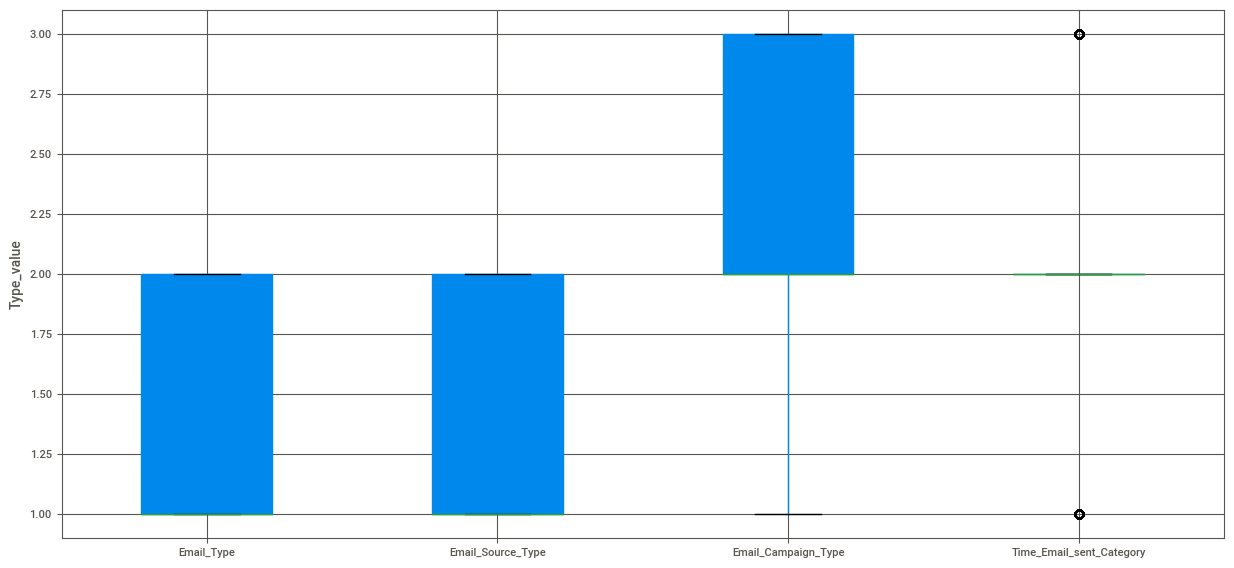

In [74]:
plt.figure(figsize=(15,7))

independent_features_categoric = ['Email_Type','Email_Source_Type','Email_Campaign_Type','Time_Email_sent_Category', ] # Since "Email_Status" is also categorical but it is dependent variable so ignored.

email_df.boxplot(independent_features_categoric,  patch_artist=True)
 
plt.ylabel('Type_value')
plt.show()

## ii) 

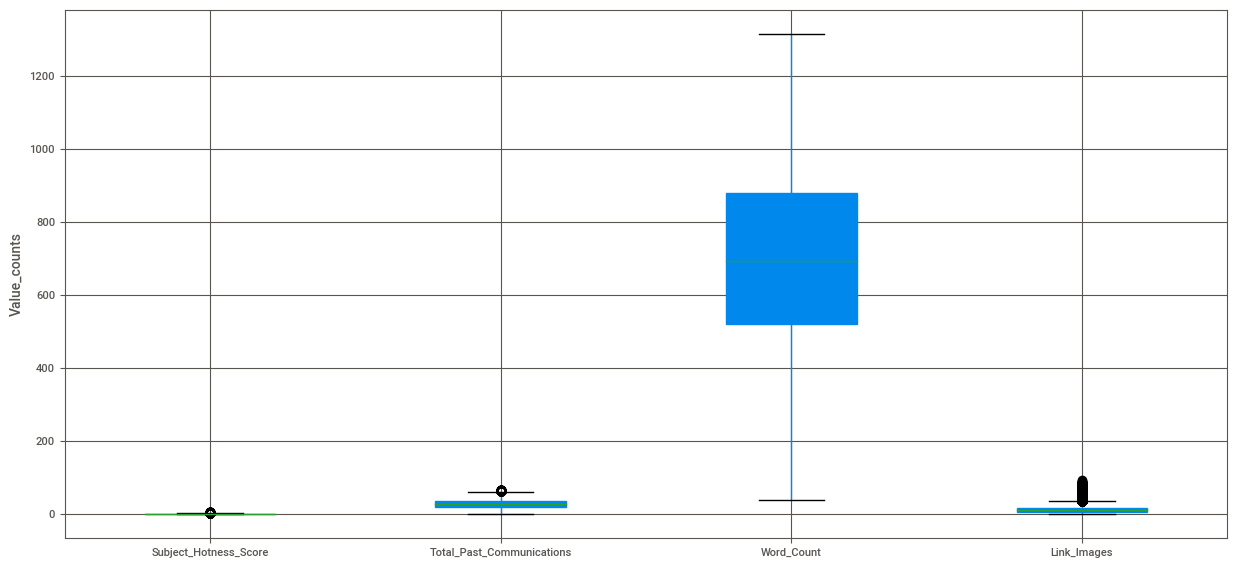

In [75]:
plt.figure(figsize=(15,7))
independent_features_numeric =['Subject_Hotness_Score','Total_Past_Communications','Word_Count','Link_Images']   # Since "Total_Images" and "Total_Links" are both numerical features but they have positive correlation so we have performed feature engineering and created "Link_Images" column
email_df.boxplot(independent_features_numeric,  patch_artist=True)

plt.ylabel('Value_counts')
plt.show()

Observations := 

1) From Categorical Features = No any outliers presents.

2) From Numerical_features = Subject_Hotness_score , Total_past_communications, and Links_Images, have some amount of outliers present in features. 

3) So we have to Remives these outliers, Because outliers causes skewness and also affects accuracy of model.

4) we can use IQR method to remove Outliers.



Since our dependent variable is highly imbalanced so before dropping outliers we should check that if removing outliers, will not going to delete more than 5% of minority classes i.e.  Email_Status =1, 2

{'Subject_Hotness_Score': {0: 170, 1: 76, 2: 1}, 'Total_Past_Communications': {1: 56, 0: 67, 2: 13}, 'Link_Images': {0: 3061, 1: 437, 2: 122}}


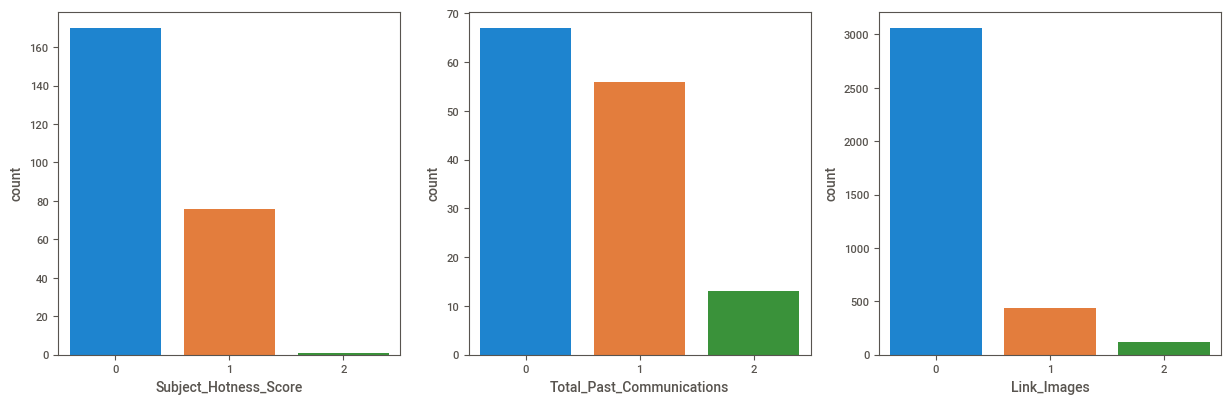

In [76]:
#removing Word_Count because it does'nt have outlier
independent_features_numeric.remove('Word_Count')

fig = plt.figure(figsize = (15,10))
n = 1
#Creating a dictionary  to store the count of each email_status 
Email_count_dict ={}
#iterating through each column which have outliers
for x in [y for y in independent_features_numeric]:   # y=represents columns
    #Finding Quartile
    q3,q1 = np.percentile(email_df.loc[:,x],[75,25])
    #Calculating Inter Quartile Range
    IQR = q3-q1
    #Fixing Boundaries for outliers
    max = q3+(1.5*IQR)
    min = q1-(1.5*IQR)
    
    #creating list to store email_status of only outliers
    email_outlier_list =[]
    email_outlier_list =email_df.loc[email_df[x] < min]['Email_Status'].tolist()
    email_outlier_list.append(email_df.loc[email_df[x] > max]['Email_Status'].tolist()) 
    Email_count_dict[x]={}
    for i in email_outlier_list[0]:
      Email_count_dict[x][i] = Email_count_dict[x].get(i,0) + 1
    ax1 = fig.add_subplot(2,3,n)
    sns.countplot(email_outlier_list[0],ax=ax1)
    plt.xlabel(x)      
    n = n +1
print(Email_count_dict)
  

Explanation of Above piecce of code.

1)Iterating numeric features to identify outliers and counting the occurrence of email_status for those outliers.

2) and then we calculated the IQR (interquartile range) to define the upper and lower boundaries for outliers, and then identifies any email records with numeric values that fall outside these boundaries.

3) And for each email outlier record, the code adds the email_status value to a dictionary with a count of the occurrences of that email_status for that particular numeric feature.

4) And ploting countplot for each numeric feature that has outliers, showing the distribution of email_status values for those email outlier records.

Observations := 
From above countplot Shows number of outliers for each email_status of these features.

1) Subject_Hotness_score feature := 

 170 records or mails are  outliers from upper boundary for (email status =0)

 76 records are pressent as outliers for email status 1

 and 1 record  is present as outlier for email_status 2

2) Total past communications :=

 67 recored are as outliers for email status 0

 56 records as outliers for email status 1

 13 records as outliers for email status

3) Link Images :=
 
 3061 records as outliers for email status 0

 437 records as outliers for email status 1

 122 recored as outliers for email status 2

Now here we have to check whether outliers of these features are removes 5% or greater value counts of our dependent variables.

Since our dependent variable is highly imbalanced so before dropping outliers we should check that if removing outliers, will not going to delete more than 5% of minority classes i.e. Email_Status =1, 2

so we have to check minority classes % of outliers data of these features.

In [77]:
Email_count_dict

{'Subject_Hotness_Score': {0: 170, 1: 76, 2: 1},
 'Total_Past_Communications': {1: 56, 0: 67, 2: 13},
 'Link_Images': {0: 3061, 1: 437, 2: 122}}

In [78]:
#finding the percentage of minority classs going to be affected by outliers
sum_minority =0
sum_majority =0
for x in [y for y in independent_features_numeric]:
  sum_minority +=Email_count_dict[x][1]               # Accessing Kye values of dictionary 
  sum_minority +=Email_count_dict[x][2]
  sum_majority +=Email_count_dict[x][0]
total_1_and_2 =email_df.groupby('Email_Status').count()['Email_Type'][1] + email_df.groupby('Email_Status').count()['Email_Type'][2]       # concatenating both groups of 
total_0=email_df.groupby('Email_Status').count()['Email_Type'][0]
print("Percentage of majority class having outliers = ",100*sum_majority /total_0)
print("Percentage of minority class having outliers = ",100*sum_minority /total_1_and_2)

Percentage of majority class having outliers =  6.002803006861907
Percentage of minority class having outliers =  5.256486728303012


So If we removes outliers from this features we will delete 5.25% records of Minority classes. And it is not good thing to delete this much amount of data. Because we have to build a model to predict Email status effectively.

Now we have done with the data cleaning, Feature engineering, data visualization, and analysed categorical and numerical features with different plots.

Now its time to move on for making Data Ready for model building. 

Since Our feature has categorical data and Machine learning does not works on categorical data so we have to replace them with numeric data. 

here we use data encoding technique like One hot encoding.

# 15) Normalizing Features

Scalling data for building good model.

In [79]:
email_df.head(2)

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status,Link_Images
0,EMA00081000034500,1,2.20 %,2,2,33.00 %,1,440,8.00 %,0.00 %,0,8.00 %
1,EMA00081000045360,2,2.10 %,1,2,15.00 %,2,504,5.00 %,0.00 %,0,5.00 %


Since We have := 

 dependent feature = Email status 

 Categorical features = , Email Id, Email Type , Email Source Type , Email Campaign type , and Time Email sent category.

 Numerical features = Subject hotness score, Total past communications, Word count, Total links, Total images, Link images. 

 Note  We have created Link Images Column by feature engineering on Total Links and Total Images columns. 

 So we have no need of Total Links and total images feature.

 and also Email Id does not give much feature importance so we will drop it.

In [80]:
# Creating copy of original dataframe 

model_df = email_df.copy()

In [81]:
model_df = model_df.drop(['Email_ID','Total_Links','Total_Images'], axis=1)           # Dropping columns 

In [82]:
model_df.head(2)

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Email_Status,Link_Images
0,1,2.20 %,2,2,33.00 %,1,440,0,8.00 %
1,2,2.10 %,1,2,15.00 %,2,504,0,5.00 %


## Now Feature Normalization 

Data normalization is the process of reorganizing data within a database so that we can utilize it for further queries and analysis. Simply put, it is the process of developing clean data. This includes eliminating redundant and unstructured data and making the data appear similar across all records and fields.

since Normalization is done on both Numerical and Categorical features But after doing one hot encoding there is not much scale difference in categorical features. 

so we only perform Normalization on Numerical features.

Using Normalization formula = 

here X is column  

       (X -Xmin) / (Xmax - Xmin)

In [83]:
#applying  normalization techniques
numerical_col_in_df =['Subject_Hotness_Score','Total_Past_Communications','Word_Count','Link_Images']
for column in numerical_col_in_df:
    model_df[column] = (model_df[column] - model_df[column].min()) / (model_df[column].max() - model_df[column].min()) 

In [84]:
model_df.head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Email_Status,Link_Images
0,1,0.44 %,2,2,0.49 %,1,0.31 %,0,0.08 %
1,2,0.42 %,1,2,0.22 %,2,0.36 %,0,0.04 %
2,2,0.02 %,1,3,0.54 %,2,0.72 %,1,0.04 %
3,1,0.60 %,2,2,0.37 %,2,0.45 %,0,0.16 %
4,1,0.00 %,2,3,0.27 %,2,0.71 %,0,0.03 %


Now Our Dataframe is well scaled and Normalized

In [85]:
print(f'dataframe shape before encoding {model_df.shape}' )

dataframe shape before encoding (68353, 9)


Now our dataframe is ready to go for data encoding on categorical features.

# 16) Data Encoding 

One-hot encoding is an important step for preparing your dataset for use in machine learning. One-hot encoding turns your categorical data into a binary vector representation. Pandas get dummies makes this very easy!

Categorical features are = ['Email_Type', 'Email_Source_Type',    'Email_Campaign_Type', 'Time_Email_sent_Category']

In [86]:
categorical_columns = ['Email_Type','Email_Source_Type','Email_Campaign_Type','Time_Email_sent_Category']

model_df = pd.get_dummies(model_df, columns=categorical_columns)

In [87]:
model_df.head()

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Email_Status,Link_Images,Email_Type_1,Email_Type_2,Email_Source_Type_1,Email_Source_Type_2,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3
0,0.44 %,0.49 %,0.31 %,0,0.08 %,1,0,0,1,0,1,0,1,0,0
1,0.42 %,0.22 %,0.36 %,0,0.04 %,0,1,1,0,0,1,0,0,1,0
2,0.02 %,0.54 %,0.72 %,1,0.04 %,0,1,1,0,0,0,1,0,1,0
3,0.60 %,0.37 %,0.45 %,0,0.16 %,1,0,0,1,0,1,0,0,1,0
4,0.00 %,0.27 %,0.71 %,0,0.03 %,1,0,0,1,0,0,1,0,1,0


Passing Our Target Variable To last of dataframe :-  

In [88]:
list_col = list(model_df.columns)
list_col.remove('Email_Status')
list_col.append('Email_Status')
list_col
model_df = model_df[list_col]

In [89]:
model_df.head(2)

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Link_Images,Email_Type_1,Email_Type_2,Email_Source_Type_1,Email_Source_Type_2,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3,Email_Status
0,0.44 %,0.49 %,0.31 %,0.08 %,1,0,0,1,0,1,0,1,0,0,0
1,0.42 %,0.22 %,0.36 %,0.04 %,0,1,1,0,0,1,0,0,1,0,0


In [90]:
model_df.shape

(68353, 15)

Since spliting Data for training and testing, before that we must check which feature is most important which are least important.

Becauze features which has less importance to predict Target variable has to be dropped from training model. Because it will make our model bias i.e. Overfitting will occur. so to avoid this let us check Feature importnaces.

# 17) Feature Importances

defining a impurity function 

using entropy formula 

    impurity or entropy = sumation [-plog(p)]

In [91]:
def computing_impurity(feature):
    """
    This function calculates impurity of a feature.
    argument =Input :- feature : (this needs to be a Pandas series)
    output after applying function :- feature impurity
    """
    probability_dist = feature.value_counts(normalize=True)          # normalizing distribution of features.
    impurity_or_entropy = -1 * np.sum(np.log2(probability_dist) * probability_dist)      # Entropy formula
    return(round(impurity_or_entropy, 3))              # impurity rounded of upto 3 decimal.

In [92]:
def calc_feature_information_gain(df, target, independent_feature):                        # arguments := 1) df = dataframe , 2) Target variable, 3) independent features 
    """
    This function calculates information gain for splitting on 
    a particular descriptive feature for a given dataset
    and a given impurity criteria.
    Supported split criterion: 'entropy'
    """
    target_entropy = computing_impurity(df[target])

    # we define two lists below:
    # entropy_list to store the entropy of each partition
    # weight_list to store the relative number of observations in each partition
    entropy_list = list()
    weight_list = list()
    
    # loop over each level of the independent feature to partition the dataset with respect to that level and compute the entropy and the weight of the level's partition
    for level in df[independent_feature].unique():
        df_feature_level = df[df[independent_feature] == level]
        entropy_level = computing_impurity(df_feature_level[target])
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(df_feature_level) / len(df)
        weight_list.append(round(weight_level, 3))

    remaining_features_impurity = np.sum(np.array(entropy_list) * np.array(weight_list))
    
    
    information_gain = target_entropy - remaining_features_impurity
    

    return(information_gain)

Information gain uses entropy to make decisions. If the entropy is less, information will be more. Information gain is used in decision trees and random forest to decide the best split. Thus, the more the information gain the better the split and this also means lower the entropy.

Subject_Hotness_Score : 0.03815999999999997
Total_Past_Communications : 0.08543499999999993
Word_Count : 0.04493199999999986
Link_Images : 0.023570999999999898
Email_Type_1 : 0.00040000000000006697
Email_Type_2 : 0.00040000000000006697
Email_Source_Type_1 : 4.899999999996574e-05
Email_Source_Type_2 : 4.899999999996574e-05
Email_Campaign_Type_1 : 0.017567
Email_Campaign_Type_2 : 0.050541999999999976
Email_Campaign_Type_3 : 0.03729300000000002
Time_Email_sent_Category_1 : -0.0008010000000000517
Time_Email_sent_Category_2 : -0.0006019999999999914
Time_Email_sent_Category_3 : 0.0


Text(0.5, 1.0, 'Feature Importance to predict Email_Status')

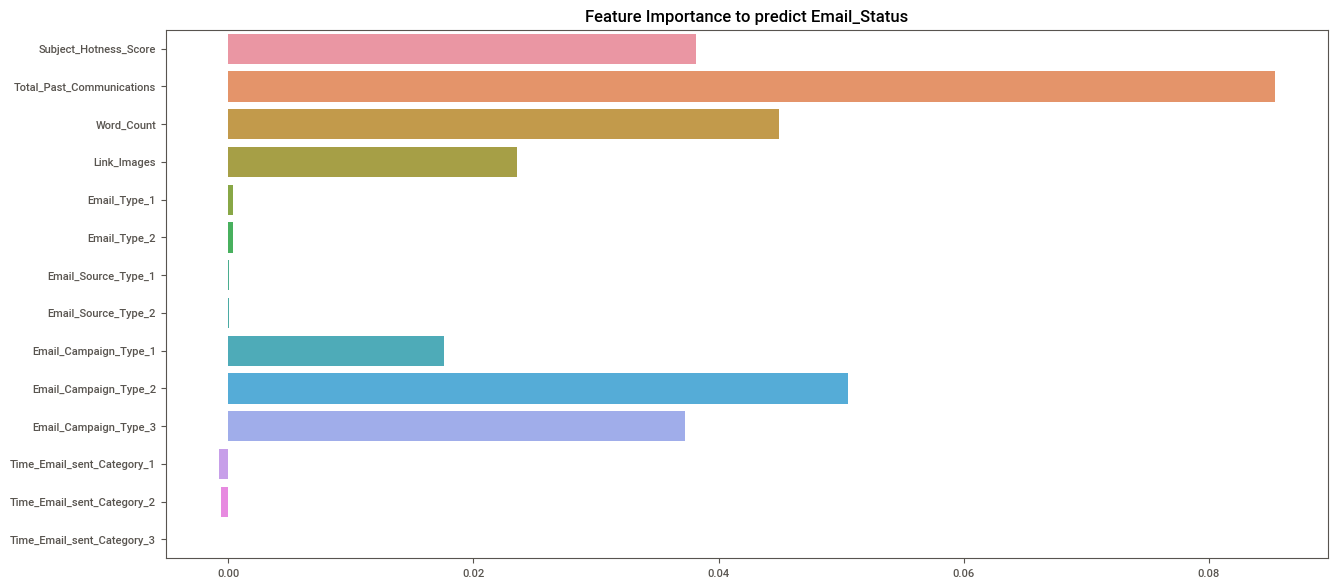

In [93]:
information_gain={}                   # creating dictionary of features information gain 
for feature in model_df.drop(columns='Email_Status').columns:
    feature_information_gain = calc_feature_information_gain(model_df, 'Email_Status', feature)
    information_gain[feature]=feature_information_gain
    print(feature, ':', feature_information_gain)
keys = list(information_gain.keys())
# get values in the same order as keys, and parse percentage values
values = [float(information_gain[k]) for k in information_gain]
plt.figure(figsize=(15,7))
sns.barplot(y=keys, x=values)
plt.title('Feature Importance to predict Email_Status')

Observations := 

We can observe that Time_Email_sent_Category_1, Time_Email_sent_Category_2,  Time_Email_sent_Category_3  have very less or negative importances so  we can drop these feature.

In [94]:
model_df.head(2)

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Link_Images,Email_Type_1,Email_Type_2,Email_Source_Type_1,Email_Source_Type_2,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3,Email_Status
0,0.44 %,0.49 %,0.31 %,0.08 %,1,0,0,1,0,1,0,1,0,0,0
1,0.42 %,0.22 %,0.36 %,0.04 %,0,1,1,0,0,1,0,0,1,0,0


In [95]:
model_df.drop(['Time_Email_sent_Category_1', 'Time_Email_sent_Category_2', 'Time_Email_sent_Category_3'], inplace=True, axis =1)

In [96]:
model_df.head(2)

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Link_Images,Email_Type_1,Email_Type_2,Email_Source_Type_1,Email_Source_Type_2,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Email_Status
0,0.44 %,0.49 %,0.31 %,0.08 %,1,0,0,1,0,1,0,0
1,0.42 %,0.22 %,0.36 %,0.04 %,0,1,1,0,0,1,0,0


Now before spliting data for training and testing. we have to make features data in balance.

Since our dependent variable is imbalanced. 

# 18) Feature Imbalance handeling 

A widely adopted technique for dealing with highly unbalanced datasets is called resampling. 

there are two methods of resampling := 

1) Under sampling =( high majority classes and Less minority classes data)

 Undersampling is a technique to balance uneven datasets by keeping all of the data in the minority class and decreasing the size of the majority class.

2) Oversampling = (Less majority class data and hight minority class data)

Random oversampling involves randomly selecting examples from the minority class, with replacement, and adding them to the training dataset.

Since we know by value counts of our target feature there are majority is of  class=0 and minority classes are 1 and 2 

so here we have under sampled data

so using random under sampling method to balance data

## i) Random Under sampling :-  

Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.



In [98]:
# importing library

from imblearn.under_sampling import RandomUnderSampler

# importing counter to make dictionary of features columns as "Keys" and its unique value counts as "Values"

from collections import Counter

In [101]:
rus = RandomUnderSampler(random_state= 32, replacement=True)

xrus, yrus = rus.fit_resample(model_df.iloc[:, :-1], model_df['Email_Status'])


In [108]:
print('original dataset shape = ', model_df.shape)

print('resampled dataset shape  = ', xrus.shape, yrus.shape)

original dataset shape =  (68353, 12)
resampled dataset shape  =  (7119, 11) (7119,)


ploting bar plot for more visualization of randum under sampling for target variale

The Counter object is a built-in Python data structure that takes an iterable as input and returns a dictionary with the count of each unique element in the iterable. In this case, Counter(model_df['Email_Status']) is returning a dictionary with the count of each unique value in the Email_Status column of model_df

Text(0.5, 1.0, 'dataset value counts wrt email_status before Random under sampling')

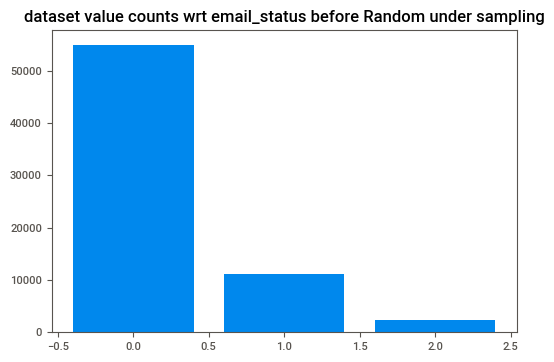

In [109]:
plt.bar(Counter(model_df['Email_Status']).keys(), Counter(model_df['Email_Status']).values())
plt.title('Email_status column before Random under sampling')

Text(0.5, 1.0, 'Email status column after Random under sampling')

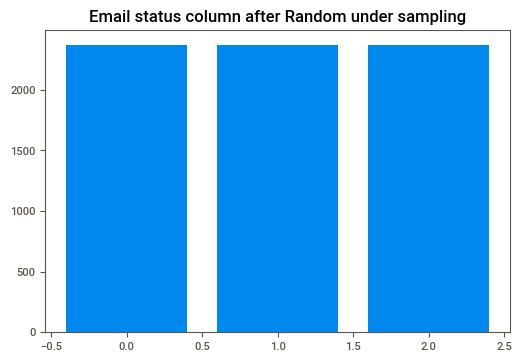

In [112]:
plt.bar(Counter(yrus).keys(), Counter(yrus).values())
plt.title('Email status column after Random under sampling')

So we see that we have achived feature balance for our target variable.

similarly we also plot and visualize other independent features. 

as we have stored data in "xrus"  name.

Now we can go ahead to split the data for trainig and testing the model 

# 19) Spliting dataset into trainig and testing ML models

In [113]:
xtrain , xtest, ytrain, ytest = train_test_split(xrus, yrus, test_size=0.2, random_state = 3, stratify=yrus)

We have 80% training dataset and 20% for testing 

and we have used stratify on dependent variable (yrus) to make sure train and test dataset have same proportion ratio to make prediction on dependent variable

Creating a common function to all model which we want to build.